In [1]:
import json
import numpy as np
import os
import dataclasses
import matplotlib.pyplot as plt
import itertools

In [2]:
@dataclasses.dataclass
class SuzipuAdditionalSymbol:
    ADD_NONE: None = None
    ADD_DA_DUN: str = "DA_DUN"
    ADD_XIAO_ZHU: str = "XIAO_ZHU"
    ADD_DING_ZHU: str = "DING_ZHU"
    ADD_DA_ZHU: str = "DA_ZHU"
    ADD_ZHE: str = "ZHE"
    ADD_YE: str = "YE"

@dataclasses.dataclass
class GongcheMelodySymbol:
    HE: str = "HE"
    XIA_SI: str = "XIA_SI"
    SI: str = "SI"
    XIA_YI: str = "XIA_YI"
    YI: str = "YI"
    SHANG: str = "SHANG"
    GOU: str = "GOU"
    CHE: str = "CHE"
    XIA_GONG: str = "XIA_GONG"
    GONG: str = "GONG"
    XIA_FAN: str = "XIA_FAN"
    FAN: str = "FAN"
    LIU: str = "LIU"
    XIA_WU: str = "XIA_WU"
    WU: str = "WU"
    GAO_WU: str = "GAO_WU"
    
    @classmethod
    def to_simple(cls, symbol):
        try:
            return {
                GongcheMelodySymbol.HE: GongcheMelodySymbol.HE,
                GongcheMelodySymbol.XIA_SI: GongcheMelodySymbol.SI,
                GongcheMelodySymbol.SI: GongcheMelodySymbol.SI,
                GongcheMelodySymbol.XIA_YI: GongcheMelodySymbol.YI,
                GongcheMelodySymbol.YI: GongcheMelodySymbol.YI,
                GongcheMelodySymbol.SHANG: GongcheMelodySymbol.SHANG,
                GongcheMelodySymbol.GOU: GongcheMelodySymbol.GOU,
                GongcheMelodySymbol.CHE: GongcheMelodySymbol.CHE,
                GongcheMelodySymbol.XIA_GONG: GongcheMelodySymbol.GONG,
                GongcheMelodySymbol.GONG: GongcheMelodySymbol.GONG,
                GongcheMelodySymbol.XIA_FAN: GongcheMelodySymbol.FAN,
                GongcheMelodySymbol.FAN: GongcheMelodySymbol.FAN,
                GongcheMelodySymbol.LIU: GongcheMelodySymbol.LIU,
                GongcheMelodySymbol.XIA_WU: GongcheMelodySymbol.WU,
                GongcheMelodySymbol.WU: GongcheMelodySymbol.WU,
                GongcheMelodySymbol.GAO_WU: GongcheMelodySymbol.GAO_WU,
            }[symbol]
        except KeyError:
            return "INVALID"

    @classmethod
    def to_lvlv(cls, symbol):
        try:
            return {
                GongcheMelodySymbol.HE: "黃",
                GongcheMelodySymbol.XIA_SI: "大",
                GongcheMelodySymbol.SI: "太",
                GongcheMelodySymbol.XIA_YI: "夾",
                GongcheMelodySymbol.YI: "姑",
                GongcheMelodySymbol.SHANG: "仲",
                GongcheMelodySymbol.GOU: "蕤",
                GongcheMelodySymbol.CHE: "林",
                GongcheMelodySymbol.XIA_GONG: "夷",
                GongcheMelodySymbol.GONG: "南",
                GongcheMelodySymbol.XIA_FAN: "無",
                GongcheMelodySymbol.FAN: "應",
                GongcheMelodySymbol.LIU: "清黃",
                GongcheMelodySymbol.XIA_WU: "清大",
                GongcheMelodySymbol.WU: "清太",
                GongcheMelodySymbol.GAO_WU: "清夾",
            }[symbol]
        except KeyError:
            return "INVALID"

    @classmethod
    def to_gongche(cls, symbol):
        try:
            return {
                GongcheMelodySymbol.HE: "合",
                GongcheMelodySymbol.XIA_SI: "下四",
                GongcheMelodySymbol.SI: "四",
                GongcheMelodySymbol.XIA_YI: "下一",
                GongcheMelodySymbol.YI: "一",
                GongcheMelodySymbol.SHANG: "上",
                GongcheMelodySymbol.GOU: "勾",
                GongcheMelodySymbol.CHE: "尺",
                GongcheMelodySymbol.XIA_GONG: "下工",
                GongcheMelodySymbol.GONG: "工",
                GongcheMelodySymbol.XIA_FAN: "下凡",
                GongcheMelodySymbol.FAN: "凡",
                GongcheMelodySymbol.LIU: "六",
                GongcheMelodySymbol.XIA_WU: "下五",
                GongcheMelodySymbol.WU: "五",
                GongcheMelodySymbol.GAO_WU: "高五"
            }[symbol]
        except KeyError:
            return "INVALID"

    @classmethod
    def to_index(cls, symbol):
        try:
            return {
                GongcheMelodySymbol.HE: 0,
                GongcheMelodySymbol.XIA_SI: 1,
                GongcheMelodySymbol.SI: 2,
                GongcheMelodySymbol.XIA_YI: 3,
                GongcheMelodySymbol.YI: 4,
                GongcheMelodySymbol.SHANG: 5,
                GongcheMelodySymbol.GOU: 6,
                GongcheMelodySymbol.CHE: 7,
                GongcheMelodySymbol.XIA_GONG: 8,
                GongcheMelodySymbol.GONG: 9,
                GongcheMelodySymbol.XIA_FAN: 10,
                GongcheMelodySymbol.FAN: 11,
                GongcheMelodySymbol.LIU: 12,
                GongcheMelodySymbol.XIA_WU: 13,
                GongcheMelodySymbol.WU: 14,
                GongcheMelodySymbol.GAO_WU: 15
            }[symbol]
        except KeyError:
            return "INVALID"

    @classmethod
    def from_string(cls, str):
        try:
            return {
                "合": "0",
                "下四": "1",
                "四": "2",
                "下一": "3",
                "一": "4",
                "上": "5",
                "勾": "6",
                "尺": "7",
                "下工": "8",
                "工": "9",
                "下凡": "A",
                "凡": "B",
                "六": "C",
                "下五": "D",
                "五": "E",
                "高五": "F",

                "黃": "0",
                "大": "1",
                "太": "2",
                "夾": "3",
                "姑": "4",
                "仲": "5",
                "蕤": "6",
                "林": "7",
                "夷": "8",
                "南": "9",
                "無": "A",
                "應": "B",
                "清黃": "C",
                "清大": "D",
                "清太": "E",
                "清夾": "F",
            }[str]
        except KeyError:
            print(f"'{str}' is not a valid gongche string identifier.")
            return "INVALID"

@dataclasses.dataclass
class Lvlv:
    HUANGZHONG: str = "HUANGZHONG"
    DALV: str = "DALV"
    TAICU: str = "TAICU"
    JIAZHONG: str = "JIAZHONG"
    GUXIAN: str = "GUXIAN"
    ZHONGLV: str = "ZHONGLV"
    RUIBIN: str = "RUIBIN"
    LINZHONG: str = "LINZHONG"
    YIZE: str = "YIZE"
    NANLV: str = "NANLV"
    WUYI: str = "WUYI"
    YINGZHONG: str = "YINGZHONG"

    @classmethod
    def to_name(cls, lvlv):
        try:
            return {
                cls.HUANGZHONG: "黄钟",
                cls.DALV: "大吕",
                cls.TAICU: "太簇",
                cls.JIAZHONG: "夹钟",
                cls.GUXIAN: "姑洗",
                cls.ZHONGLV: "仲吕",
                cls.RUIBIN: "蕤宾",
                cls.LINZHONG: "林钟",
                cls.YIZE: "夷则",
                cls.NANLV: "南吕",
                cls.WUYI: "无射",
                cls.YINGZHONG: "应钟"
            }[lvlv]
        except KeyError:
            print(f"'{lvlv}' is not a valid lülü.")
            return "INVALID"

    @classmethod
    def from_name(cls, string):
        try:
            return {
                "黄钟": cls.HUANGZHONG,
                "大吕": cls.DALV,
                "太簇": cls.TAICU,
                "夹钟": cls.JIAZHONG,
                "姑洗": cls.GUXIAN,
                "仲吕": cls.ZHONGLV,
                "蕤宾": cls.RUIBIN,
                "林钟": cls.LINZHONG,
                "夷则": cls.YIZE,
                "南吕": cls.NANLV,
                "无射": cls.WUYI,
                "应钟": cls.YINGZHONG,
            }[string]
        except KeyError:
            print(f"'{string}' is not a valid lülü name")
            return cls.HUANGZHONG

    @classmethod
    def to_int(cls, lvlv):
        try:
            return {
                cls.HUANGZHONG: 0,
                cls.DALV: 1,
                cls.TAICU: 2,
                cls.JIAZHONG: 3,
                cls.GUXIAN: 4,
                cls.ZHONGLV: 5,
                cls.RUIBIN: 6,
                cls.LINZHONG: 7,
                cls.YIZE: 8,
                cls.NANLV: 9,
                cls.WUYI: 10,
                cls.YINGZHONG: 11,
            }[lvlv]
        except KeyError:
            print(f"'{lvlv}' is not a valid lülü")
            return 0

    @classmethod
    def from_int(cls, int):
        try:
            return {
                0: cls.HUANGZHONG,
                1: cls.DALV,
                2: cls.TAICU,
                3: cls.JIAZHONG,
                4: cls.GUXIAN,
                5: cls.ZHONGLV,
                6: cls.RUIBIN,
                7: cls.LINZHONG,
                8: cls.YIZE,
                9: cls.NANLV,
                10: cls.WUYI,
                11: cls.YINGZHONG,
            }[int]
        except KeyError:
            print(f"'{int}' is not a valid lülü int")
            return cls.HUANGZHONG
        
@dataclasses.dataclass
class GongdiaoStep:
    GONG: str = "GONG"
    SHANG: str = "SHANG"
    JUE: str = "JUE"
    BIAN: str = "BIAN"
    ZHI: str = "ZHI"
    YU: str = "YU"
    RUN: str = "RUN"

    @classmethod
    def to_name(cls, gongdiaostep):
        try:
            return {GongdiaoStep.GONG: "宫",
             GongdiaoStep.SHANG: "商",
             GongdiaoStep.JUE: "角",
             GongdiaoStep.BIAN: "变",
             GongdiaoStep.ZHI: "徵",
             GongdiaoStep.YU: "羽",
             GongdiaoStep.RUN: "闰"}[gongdiaostep]
        except KeyError:
            return "INVALID"

    @classmethod
    def from_name(cls, gongdiaostep):
        try:
            return {"宫": GongdiaoStep.GONG,
                    "商": GongdiaoStep.SHANG,
                    "角": GongdiaoStep.JUE,
                    "变": GongdiaoStep.BIAN,
                    "徵": GongdiaoStep.ZHI,
                    "羽": GongdiaoStep.YU,
                    "闰": GongdiaoStep.RUN}[gongdiaostep]
        except KeyError:
            return GongdiaoStep.GONG
    
    @classmethod
    def to_index(cls, gongdiaostep):
        try:
            return {GongdiaoStep.GONG: 0,
             GongdiaoStep.SHANG: 1,
             GongdiaoStep.JUE: 2,
             GongdiaoStep.BIAN: 3,
             GongdiaoStep.ZHI: 4,
             GongdiaoStep.YU: 5,
             GongdiaoStep.RUN: 6}[gongdiaostep]
        except KeyError:
            return "INVALID"
        
        
class GongdiaoMode:
    def __init__(self, name, chinese_name, tone_inventory: str, final_note: str):
        self.name = name
        self.chinese_name = chinese_name
        self.gong_lvlv = tone_inventory
        self.final_note = final_note

    def check_if_pitch_belongs_to_mode(self, pitch: str, is_suzipu: bool=False):

        if pitch == "" or pitch is None:
            return None
        try:
            pitch_symbol = pitch[0]  # only consider first character
            if is_suzipu:  # in case of suzipu, we must convert it to the pitch which is meant first
                pitch_symbol = self.convert_pitch(pitch_symbol)
            return tone_inventory_check_pitch(self.gong_lvlv, pitch_symbol)
        except:
            return None

    def convert_pitch(self, pitch):
        return tone_inventory_convert_pitch(self.gong_lvlv, pitch)

    def convert_pitches_in_list(self, original_list):
        new_list = []
        for idx in range(len(original_list)):
            try:
                if "secondary" in original_list[idx].keys():
                    new_list.append({"pitch": self.convert_pitch(original_list[idx]["pitch"]), "secondary": original_list[idx]["secondary"]})
                else:
                    new_list.append({"pitch": self.convert_pitch(original_list[idx]["pitch"])})
            except AttributeError:
                new_list.append({"pitch": None})
        return new_list

    def get_properties(self):
        return {"gong_lvlv": self.gong_lvlv, "final_note": self.final_note}

@dataclasses.dataclass
class GongdiaoModeList:
    BAN_SHE_DIAO: GongdiaoMode = GongdiaoMode("Ban She Diao", "般涉调", Lvlv.HUANGZHONG, GongdiaoStep.YU)
    DA_SHI_JUE: GongdiaoMode = GongdiaoMode("Da Shi Jue", "大食角", Lvlv.HUANGZHONG, GongdiaoStep.RUN)
    ZHENG_GONG: GongdiaoMode= GongdiaoMode("Zheng Gong", "正宫", Lvlv.HUANGZHONG, GongdiaoStep.GONG)
    DA_SHI_DIAO: GongdiaoMode = GongdiaoMode("Da Shi Diao", "大食调", Lvlv.HUANGZHONG, GongdiaoStep.SHANG)

    HUANG_ZHONG_JUE: GongdiaoMode = GongdiaoMode("*Huang Zhong Jue", "黄钟角", Lvlv.HUANGZHONG, GongdiaoStep.JUE)
    HUANG_ZHONG_ZHI: GongdiaoMode = GongdiaoMode("*Huang Zhong Zhi", "黄钟徵", Lvlv.HUANGZHONG, GongdiaoStep.ZHI)

    GAO_BAN_SHE_DIAO: GongdiaoMode = GongdiaoMode("Gao Ban She Diao", "高般涉调", Lvlv.DALV, GongdiaoStep.YU)
    GAO_DA_SHI_JUE: GongdiaoMode = GongdiaoMode("Gao Da Shi Jue", "高大食角", Lvlv.DALV, GongdiaoStep.RUN)
    GAO_GONG: GongdiaoMode = GongdiaoMode("Gao Gong", "高宫", Lvlv.DALV, GongdiaoStep.GONG)
    GAO_DA_SHI_DIAO: GongdiaoMode = GongdiaoMode("Gao Da Shi Diao", "高大食调", Lvlv.DALV, GongdiaoStep.SHANG)

    ZHONG_LV_DIAO: GongdiaoMode = GongdiaoMode("Zhong Lü Diao", "中吕调", Lvlv.JIAZHONG, GongdiaoStep.YU)
    SHUANG_JUE: GongdiaoMode = GongdiaoMode("Shuang Jue", "双角", Lvlv.JIAZHONG, GongdiaoStep.RUN)
    ZHONG_LV_GONG: GongdiaoMode = GongdiaoMode("Zhong Lü Gong", "中吕宫", Lvlv.JIAZHONG, GongdiaoStep.GONG)
    SHUANG_DIAO: GongdiaoMode = GongdiaoMode("Shuang Diao", "双调", Lvlv.JIAZHONG, GongdiaoStep.SHANG)

    ZHENG_PING_DIAO: GongdiaoMode = GongdiaoMode("Zheng Ping Diao", "正平调", Lvlv.ZHONGLV, GongdiaoStep.YU)
    XIAO_SHI_JUE: GongdiaoMode = GongdiaoMode("Xiao Shi Jue", "小食角", Lvlv.ZHONGLV, GongdiaoStep.RUN)
    DAO_GONG: GongdiaoMode = GongdiaoMode("Dao Gong", "道宫", Lvlv.ZHONGLV, GongdiaoStep.GONG)
    XIAO_SHI_DIAO: GongdiaoMode = GongdiaoMode("Xiao Shi Diao", "小食调", Lvlv.ZHONGLV, GongdiaoStep.SHANG)

    NAN_LV_DIAO: GongdiaoMode = GongdiaoMode("Nan Lü Diao", "南吕调", Lvlv.LINZHONG, GongdiaoStep.YU)  # also 高平调
    XIE_ZHI_JUE: GongdiaoMode = GongdiaoMode("Xie Zhi Jue", "歇指角", Lvlv.LINZHONG, GongdiaoStep.RUN)
    NAN_LV_GONG: GongdiaoMode = GongdiaoMode("Nan Lü Gong", "南吕宫", Lvlv.LINZHONG, GongdiaoStep.GONG)
    XIE_ZHI_DIAO: GongdiaoMode = GongdiaoMode("Xie Zhi Diao", "歇指调", Lvlv.LINZHONG, GongdiaoStep.SHANG)

    XIAN_LV_DIAO: GongdiaoMode = GongdiaoMode("Xian Lü Diao", "仙吕调", Lvlv.YIZE, GongdiaoStep.YU)
    SHANG_JUE: GongdiaoMode = GongdiaoMode("Shang Jue", "商角", Lvlv.YIZE, GongdiaoStep.RUN)
    XIAN_LV_GONG: GongdiaoMode = GongdiaoMode("Xian Lü Gong", "仙吕宫", Lvlv.YIZE, GongdiaoStep.GONG)
    SHANG_DIAO: GongdiaoMode = GongdiaoMode("Shang Diao", "商调", Lvlv.YIZE, GongdiaoStep.SHANG)

    HUANG_ZHONG_DIAO: GongdiaoMode = GongdiaoMode("Huang Zhong Diao", "黄钟调", Lvlv.WUYI, GongdiaoStep.YU)
    YUE_JUE: GongdiaoMode = GongdiaoMode("Yue Jue", "越角", Lvlv.WUYI, GongdiaoStep.RUN)
    HUANG_ZHONG_GONG: GongdiaoMode = GongdiaoMode("Huang Zhong Gong", "黄钟宫", Lvlv.WUYI, GongdiaoStep.GONG)
    YUE_DIAO: GongdiaoMode = GongdiaoMode("Yue Diao", "越调", Lvlv.WUYI, GongdiaoStep.SHANG)

    @classmethod
    def from_string(cls, string):
        for mode in dataclasses.astuple(cls()):
            if string == mode.name or string == mode.chinese_name:
                return mode
        NO_MODE = GongdiaoMode("!!! NO MODE !!!", "！！！没有宫调！！！", Lvlv.HUANGZHONG, GongdiaoStep.GONG)
        #print(f"Could not construct mode from string '{string}'. Returned {cls.NO_MODE.name} instead.")  # TODO: activate?
        return NO_MODE

    @classmethod
    def from_properties(cls, mode_properties):
        try:
            gong_lvlv = mode_properties["gong_lvlv"]
            final_note = mode_properties["final_note"]

            for mode in dataclasses.astuple(cls()):  # first, check if there is already a name stored for this mode
                if mode.gong_lvlv == gong_lvlv and mode.final_note == final_note:
                    return mode

            # otherwise, construct a name for it
            return GongdiaoMode(f"{Lvlv.to_name(gong_lvlv)}均 -- final：{final_note}", f"{Lvlv.to_name(gong_lvlv)}均 -- final：{final_note}", gong_lvlv, final_note)
        except KeyError:
            return GongdiaoModeList.ZHENG_GONG


def get_tone_inventory(lvlv):
    def rotate_list_right(l, idx):
        return [l[(index - idx + len(l)) % len(l)] for index in range(len(l))]

    def extend_tone_inventory(l):
        return l + l[0:4]

    huang_zhong_gong = [GongdiaoStep.GONG, None, GongdiaoStep.SHANG, None, GongdiaoStep.JUE, None, GongdiaoStep.BIAN, GongdiaoStep.ZHI, None, GongdiaoStep.YU, None, GongdiaoStep.RUN]
    return extend_tone_inventory(rotate_list_right(huang_zhong_gong, Lvlv.to_int(lvlv)))

def get_absolute_tone_inventory(lvlv):
        def rotate_list_right(l, idx):
            return [l[(index - idx + len(l)) % len(l)] for index in range(len(l))]

        def extend_tone_inventory(l):
            return l + l[0:4]
        
        if lvlv == Lvlv.LINZHONG:
            huang_zhong_gong = [GongdiaoStep.GONG, None, GongdiaoStep.SHANG, None, GongdiaoStep.JUE, None, None, GongdiaoStep.ZHI, None, GongdiaoStep.YU, None, GongdiaoStep.RUN]
        else:
            huang_zhong_gong = [GongdiaoStep.GONG, None, GongdiaoStep.SHANG, None, GongdiaoStep.JUE, None, GongdiaoStep.BIAN, GongdiaoStep.ZHI, None, GongdiaoStep.YU, None, GongdiaoStep.RUN]
        
        return extend_tone_inventory(rotate_list_right(huang_zhong_gong, Lvlv.to_int(lvlv)))
    
def get_relative_tone_inventory(lvlv):
    if lvlv == Lvlv.LINZHONG: # we need the correct steps, and this one is hexatonic!
        return ['SI', 'YI', 'GOU', 'CHE', 'GONG', 'FAN', None, 'WU']
    else:
        l = []
        for gongche_melody_symbol in dataclasses.astuple(GongcheMelodySymbol()):
            pitch = gongche_melody_symbol if gongche_melody_symbol == strict_tone_inventory_convert_pitch(lvlv, gongche_melody_symbol) else None
            if pitch:
                l.append(GongcheMelodySymbol.to_simple(pitch))
        return l

def tone_inventory_convert_pitch(gong_lvlv, pitch: GongcheMelodySymbol):
    tone_inventory = get_tone_inventory(gong_lvlv)
    def raise_error():
        print(f"Error! Incompatible symbol {pitch} according to tone inventory {tone_inventory}.")
        #raise RuntimeError(f"Error! Incompatible symbol {pitch} according to tone inventory {gong_lvlv}.")

    if pitch == None:
        return None
    # Here, we flip the order, because for Nanlüdiao we need the diatonic steps
    elif pitch == GongcheMelodySymbol.HE:
        #if gong_lvlv[0] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.XIA_SI or pitch == GongcheMelodySymbol.SI:
        if tone_inventory[2] is not None:
            return GongcheMelodySymbol.SI
        elif tone_inventory[1] is not None:
            return GongcheMelodySymbol.XIA_SI
    elif pitch == GongcheMelodySymbol.XIA_YI or pitch == GongcheMelodySymbol.YI:
        if tone_inventory[4] is not None:
            return GongcheMelodySymbol.YI
        elif tone_inventory[3] is not None:
            return GongcheMelodySymbol.XIA_YI
    elif pitch == GongcheMelodySymbol.SHANG:
        #if gong_lvlv[5] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.GOU:  # TODO: Check if GOU, having a separate Suzipu symbol, can become CHE
        #if gong_lvlv[6] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.CHE:
        #if gong_lvlv[7] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.XIA_GONG or pitch == GongcheMelodySymbol.GONG:
        if tone_inventory[9] is not None:
            return GongcheMelodySymbol.GONG
        elif tone_inventory[8] is not None:
            return GongcheMelodySymbol.XIA_GONG
    elif pitch == GongcheMelodySymbol.XIA_FAN or pitch == GongcheMelodySymbol.FAN:
        if tone_inventory[11] is not None:
            return GongcheMelodySymbol.FAN
        elif tone_inventory[10] is not None:
            return GongcheMelodySymbol.XIA_FAN
    elif pitch == GongcheMelodySymbol.LIU:
        #if gong_lvlv[12] is not None:
        return pitch
    elif pitch == GongcheMelodySymbol.XIA_WU or pitch == GongcheMelodySymbol.WU:
        if tone_inventory[14] is not None:
            return GongcheMelodySymbol.WU
        elif tone_inventory[13] is not None:
            return GongcheMelodySymbol.XIA_WU
    elif pitch == GongcheMelodySymbol.GAO_WU:
        #if gong_lvlv[15] is not None:
        return pitch

    raise_error()
    
def strict_tone_inventory_convert_pitch(gong_lvlv, pitch: GongcheMelodySymbol):
    tone_inventory = get_tone_inventory(gong_lvlv)
    def raise_error():
        print(f"Error! Incompatible symbol {pitch} according to tone inventory {tone_inventory}.")
        #raise RuntimeError(f"Error! Incompatible symbol {pitch} according to tone inventory {gong_lvlv}.")

    if pitch == None:
        return None
    # Here, we flip the order, because for Nanlüdiao we need the diatonic steps
    elif pitch == GongcheMelodySymbol.HE:
        if tone_inventory[0] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.XIA_SI or pitch == GongcheMelodySymbol.SI:
        if tone_inventory[2] is not None:
            return GongcheMelodySymbol.SI
        elif tone_inventory[1] is not None:
            return GongcheMelodySymbol.XIA_SI
    elif pitch == GongcheMelodySymbol.XIA_YI or pitch == GongcheMelodySymbol.YI:
        if tone_inventory[4] is not None:
            return GongcheMelodySymbol.YI
        elif tone_inventory[3] is not None:
            return GongcheMelodySymbol.XIA_YI
    elif pitch == GongcheMelodySymbol.SHANG:
        if tone_inventory[5] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.GOU:  # TODO: Check if GOU, having a separate Suzipu symbol, can become CHE
        if tone_inventory[6] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.CHE:
        if tone_inventory[7] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.XIA_GONG or pitch == GongcheMelodySymbol.GONG:
        if tone_inventory[9] is not None:
            return GongcheMelodySymbol.GONG
        elif tone_inventory[8] is not None:
            return GongcheMelodySymbol.XIA_GONG
    elif pitch == GongcheMelodySymbol.XIA_FAN or pitch == GongcheMelodySymbol.FAN:
        if tone_inventory[11] is not None:
            return GongcheMelodySymbol.FAN
        elif tone_inventory[10] is not None:
            return GongcheMelodySymbol.XIA_FAN
    elif pitch == GongcheMelodySymbol.LIU:
        if tone_inventory[12] is not None:
            return pitch
    elif pitch == GongcheMelodySymbol.XIA_WU or pitch == GongcheMelodySymbol.WU:
        if tone_inventory[14] is not None:
            return GongcheMelodySymbol.WU
        elif tone_inventory[13] is not None:
            return GongcheMelodySymbol.XIA_WU
    elif pitch == GongcheMelodySymbol.GAO_WU:
        if tone_inventory[15] is not None:
            return pitch

    return None

SimpleSuzipuList = [
    GongcheMelodySymbol.HE,
    GongcheMelodySymbol.SI,
    GongcheMelodySymbol.YI,
    GongcheMelodySymbol.SHANG,
    GongcheMelodySymbol.GOU,
    GongcheMelodySymbol.CHE,
    GongcheMelodySymbol.GONG,
    GongcheMelodySymbol.FAN,
    GongcheMelodySymbol.LIU,
    GongcheMelodySymbol.WU,
    GongcheMelodySymbol.GAO_WU
]

SimpleSecondaryList = [
    None,
    SuzipuAdditionalSymbol.ADD_DA_DUN,
    SuzipuAdditionalSymbol.ADD_XIAO_ZHU,
    SuzipuAdditionalSymbol.ADD_DING_ZHU,
    SuzipuAdditionalSymbol.ADD_DA_ZHU,
    SuzipuAdditionalSymbol.ADD_ZHE,
    SuzipuAdditionalSymbol.ADD_YE
]

In [3]:
def get_folder_contents(path, extension=None):
    file_list = []
    try:
        for file_path in sorted(os.listdir(path)):
            file_path = os.path.join(path, file_path)
            if os.path.isdir(file_path):
                file_list += get_folder_contents(file_path, extension)
            if not extension or file_path.lower().endswith(f'.{extension}'):
                file_list.append(file_path)
    except Exception as e:
        print(f"Could not read files from directory {path}. {e}")
    return file_list


def get_title_list(content):
    title_list = []
    for box in content:
        if box["box_type"] == "Title":
            title_list.append(box["text_content"])
    return title_list

def get_lyrics_list(content):
    lyrics_list = []
    for box in content:
        if box["box_type"] == "Music" and box["text_content"] != "":
            lyrics_list.append(box["text_content"])
    return lyrics_list

def get_suzipu_list(content):
    suzipu_list = []
    for box in content:
        if box["box_type"] == "Music" and box["notation_content"]["pitch"] is not None:
            suzipu_list.append(box["notation_content"])
    return suzipu_list

def get_pauses(lyrics):
    pause_list = []
    for lyric in lyrics:
        if len(lyric) > 1:
            pause_list.append(lyric[1])
        else:
            pause_list.append(None)
    return pause_list


def relative_pitch_to_index(mode_properties, pitch_list):
    tone_inventory = get_tone_inventory(mode_properties["gong_lvlv"])
    index_list = []
    for pitch in pitch_list:
        index_list.append(pitch_to_index[pitch])
    return index_list

def relative_pitch_to_absolute_pitch(mode_properties, relative_pitch_list):
    absolute_pitch_list = []
    for pitch in relative_pitch_list:
        absolute_pitch_list.append(tone_inventory_convert_pitch(mode_properties["gong_lvlv"], pitch))
    return absolute_pitch_list

def absolute_pitch_to_function(mode_properties, absolute_pitch_list):
    tone_inventory = get_tone_inventory(mode_properties["gong_lvlv"])
    function_list = []
    for pitch in absolute_pitch_list:
        function_list.append(tone_inventory[GongcheMelodySymbol.to_index(pitch)])
    return function_list


def absolute_pitch_to_interval(mode_properties, absolute_pitch_list):
    tone_inventory = get_tone_inventory(mode_properties["gong_lvlv"])
    
    ctr = 0
    for idx in range(len(tone_inventory)):
        if tone_inventory[idx] is not None:
            tone_inventory[idx] = ctr
            ctr += 1

    index_list = []
    for pitch in absolute_pitch_list:
        index_list.append(tone_inventory[GongcheMelodySymbol.to_index(pitch)])
    #index_list.reverse()
    index_list = np.array(index_list)
    return index_list[1:]-index_list[:-1]
        
    
FULL_PAUSE = [".", "。", "?", "？", ":", "："]
PAUSE = [",", "，", "、"]
    
def open_piece(path):
    with open(path, "r") as file:
        piece = json.load(file)
        del piece["version"]
        del piece["composer"]
        
        if piece["notation_type"] == "Suzipu":
        
            piece["title"] = {}
            piece["title"] = get_title_list(piece["content"])[0]

            piece["lyrics"] = {}
            piece["lyrics"]["list"] = get_lyrics_list(piece["content"])
            piece["lyrics"]["string"] = "".join([char if not (len(char) > 1 and char[1] in FULL_PAUSE) else "".join([char, "\n"]) for char in piece["lyrics"]["list"]])

            piece["cipai"] = {}
            piece["cipai"]["pause"] = get_pauses(piece["lyrics"]["list"])
        
        
            piece["music"] = {}
            piece["music"]["suzipu"] = get_suzipu_list(piece["content"])
            piece["music"]["relative_pitch"] = [note["pitch"] for note in piece["music"]["suzipu"]]
            piece["music"]["secondary"] = [note["secondary"] for note in piece["music"]["suzipu"]]
            piece["music"]["absolute_pitch"] = relative_pitch_to_absolute_pitch(piece["mode_properties"], piece["music"]["relative_pitch"])
            piece["music"]["function"] = absolute_pitch_to_function(piece["mode_properties"], piece["music"]["absolute_pitch"])
            piece["music"]["interval"] = absolute_pitch_to_interval(piece["mode_properties"], piece["music"]["absolute_pitch"])
            piece["music"]["reverse_interval"] = -piece["music"]["interval"][::-1]
        
        del piece["content"]
        return piece

In [4]:
corpus_dir = "../KuiSCIMA/KuiSCIMA/symbolic_dataset/02_normalized_edition"
json_files = get_folder_contents(corpus_dir, "json")

pieces = []
for path in json_files:
    piece = open_piece(path)
    if piece["notation_type"] == "Suzipu":
        pieces.append(piece)
        print(piece["title"])
        print(piece["lyrics"]["string"])
    
ALL_PIECES = pieces

for piece in ALL_PIECES:
    print(len(piece["music"]["relative_pitch"]))

鬲溪梅令
好花不與殢香人，浪粼粼。
又恐春風歸去綠成陰，玉鈿何處尋？
木蘭雙槳夢中雲，小横陳。
謾向孤山山下覔盈盈，翠禽啼一春。

杏花天影
綠絲低拂鴛鴦浦，想桃葉當時喚渡。
又將愁眼與春風，待去，倚蘭橈更少駐。
金陵路鶯吟燕儛，算潮水知人最苦。
滿汀芳草不成歸，日暮，更移舟向甚處？

醉吟商小品
又正是春歸，細柳暗黃千縷，暮鴉啼處。
夢逐金鞍去。
一點芳心休訴。
琵琶解語。

玉梅令
疏疏雪片，散入溪南苑。
春寒鎖舊家亭館。
有玉梅幾樹，背立怨東風，高花未吐，暗香已逺。
公來領客，梅花能勸，花長好願公更健。
便揉春為酒，剪雪作新詩，拚一日繞花千轉。

霓裳中序第一
亭臯正望極，亂落江蓮歸未得，多病却無氣力。
況紈扇漸疎，羅衣初索。
流光過隙，歎杏梁雙燕如客。
人何在？
一簾淡月，仿彿照顏色。
幽寂，亂蛩吟壁，動庾信清愁似織。
沉思年少浪跡，笛裏關山，柳下坊陌。
墜紅無信息，漫暗水涓涓溜碧。
漂零久，而今何意，醉卧酒壚側。

扬州慢
淮左名都，竹西佳處,解鞍少駐初程。
過春風十里，盡薺麥青青。
自胡馬窺江去後，廢池喬木，猶厭言兵。
漸黃昏清角，吹寒都在空城。
杜郎俊賞，算而今重到須驚。
縱荳蔻詞工，青樓夢好，難賦深情。
二十四橋仍在，波心蕩冷月無聲。
念橋邊紅藥，年年知為誰生？

長亭怨慢
漸吹盡，枝頭香絮，是處人家，綠深門戶。
逺浦縈回，暮帆零亂向何許？
閱人多矣，誰得似長亭樹。
樹若有情時，不會得青青如此。
日暮，望高城不見，只見亂山無數。
韋郎去也，怎忘得玉環分付：
第一是早早歸來,怕紅萼無人為主。
算只有并刀，難剪離。
愁千縷。

淡黃柳
空城曉角，吹入垂楊陌。
馬上單衣寒惻惻。
看盡鵞黃嫩綠，都是江南舊相識。
正岑寂，明朝又寒食。
强攜酒，小喬宅。
怕梨花落盡成秋色。
燕燕飛來，問春何在？
唯有池塘自碧。

石湖仙
松江烟浦，是千古三高，遊衍佳處。
須信石湖仙，似鴟夷翩然引去。
浮雲安在，我自愛、綠香紅舞。
容與，看世間幾度今古。
盧溝舊曾駐馬，為黃花閑吟秀句。
見說胡兒，也學綸巾欹雨。
玉友金蕉，玉人金縷，緩移箏柱。
聞好語，明年定在槐府。

暗香
舊時月色，算幾番照我，梅邊吹笛？
喚起玉人，不管清寒與攀摘。
何遜而今漸老，都忘却春風詞筆。
但怪得竹外疎花，香冷入瑤席。
江國，正寂寂。
歎寄與路遙，夜雪初積。
翠樽易泣，紅萼無言耿相憶。
長記曾攜手處，千

In [31]:
def get_n_grams(base_list, n, ngram_property=None):
    ngrams = []
    for idx in range(len(base_list)-(n-1)):
        triple = tuple(base_list[idx:idx+n])
        if ngram_property is None or (ngram_property and ngram_property(triple)):
            ngrams.append(triple)
    return ngrams

    
def plot_n_grams(base_pieces, key, n, title=""):    
    total_list = []
    for piece in base_pieces:
        total_list += get_n_grams(piece["music"][key], n=n)

    if key == "function":
        inventory = [GongdiaoStep.GONG, GongdiaoStep.SHANG, GongdiaoStep.JUE, GongdiaoStep.BIAN, GongdiaoStep.ZHI, GongdiaoStep.YU, GongdiaoStep.RUN]
    elif key == "interval":
        inventory = range(-9, 9, 1)
    elif key == "secondary":
        inventory = dataclasses.astuple(SuzipuAdditionalSymbol())
    elif key == "absolute_pitch":
        inventory = dataclasses.astuple(GongcheMelodySymbol())
    
    count = {}
    for combination in itertools.product(*[inventory for idx in range(n)]):
        count[combination] = 0
    
    for ngram in total_list:
        count[ngram] += 1
    #count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    display = [str(key) for key in count.keys()]
    
    plt.figure()
    plt.bar(display, np.array(list(count.values())), label=list(count.keys()), alpha=0.7)
    plt.title(f"{title}: {key} {n}-grams")
    #plt.savefig(f"{title}_{key}_{n}.pdf")
    
    return list(count.values())

def get_firsts(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        total_list.append(tuple(piece["music"][key][:n]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} finals\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_finals(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        total_list.append(tuple(piece["music"][key][-n:]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} finals\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_full_stop_finals(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, lyric in enumerate(piece["cipai"]["pause"]):
            if lyric in FULL_PAUSE:
                #print(piece["lyrics"]["list"][idx], piece["music"][key][idx])
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][idx-n:idx]))
                else:
                    total_list.append(tuple(piece["music"][key][idx+1-n:idx+1]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} finals\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_except_full_stop(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, lyric in enumerate(piece["cipai"]["pause"]):
            if lyric not in FULL_PAUSE:
                #print(piece["lyrics"]["list"][idx], piece["music"][key][idx])
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][idx-n:idx]))
                else:
                    total_list.append(tuple(piece["music"][key][idx+1-n:idx+1]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} not full stop\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_non_full_finals(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, lyric in enumerate(piece["cipai"]["pause"]):
            if lyric in PAUSE:
                #print(piece["lyrics"]["list"][idx], piece["music"][key][idx])
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][idx-n:idx]))
                else:
                    total_list.append(tuple(piece["music"][key][idx+1-n:idx+1]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} finals\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_one_after_full_stop_finals(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, lyric in enumerate(piece["cipai"]["pause"]):
            if lyric in FULL_PAUSE:
                #print(piece["lyrics"]["list"][idx], piece["music"][key][idx])
                append_idx = idx+1
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][append_idx-n:append_idx]))
                else:
                    total_list.append(tuple(piece["music"][key][append_idx+1-n:append_idx+1]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} finals\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_one_after_non_full_final(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, lyric in enumerate(piece["cipai"]["pause"]):
            if lyric in PAUSE:
                #print(piece["lyrics"]["list"][idx], piece["music"][key][idx])
                append_idx = idx+1
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][append_idx-n:append_idx]))
                else:
                    total_list.append(tuple(piece["music"][key][append_idx+1-n:append_idx+1]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} finals\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_one_after_any_final(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, lyric in enumerate(piece["cipai"]["pause"]):
            if lyric in PAUSE or lyric in FULL_PAUSE:
                #print(piece["lyrics"]["list"][idx], piece["music"][key][idx])
                append_idx = idx+1
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][append_idx-n:append_idx]))
                else:
                    total_list.append(tuple(piece["music"][key][append_idx+1-n:append_idx+1]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} finals\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_all_with_secondary(base_pieces, key, n, secondary_list, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, secondary in enumerate(piece["music"]["secondary"]):
            if secondary in secondary_list:
                append_idx = idx
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][append_idx-n:append_idx]))
                else:
                    total_list.append(tuple(piece["music"][key][append_idx+1-n:append_idx+1]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} secondary\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_all_with_secondary_first(base_pieces, key, n, secondary_list, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, secondary in enumerate(piece["music"]["secondary"]):
            if secondary in secondary_list:
                append_idx = idx
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][append_idx-1:append_idx+n-1]))
                else:
                    total_list.append(tuple(piece["music"][key][append_idx:append_idx+n]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} secondary\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def find_all_key(base_pieces, key, key_list, title=""):
    total_list = []
    n = len(key_list)
    for piece in base_pieces:
        for idx, secondary in enumerate(piece["music"]["secondary"]):
            append_idx = idx
            if key == "interval":
                to_append = piece["music"][key][append_idx-1:append_idx+n-1]
            else:
                to_append = piece["music"][key][append_idx:append_idx+n]
            if to_append == key_list:
                total_list.append(tuple(to_append))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} secondary\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

def get_ngram_statistics(base_pieces, key, n, title="", display_number=None, ngram_property=None):
    total_list = []
    for piece in base_pieces:
        total_list += get_n_grams(piece["music"][key], n=n, ngram_property=ngram_property)
    
    count = {}
    for ngram in total_list:
        try:
            count[ngram] += 1
        except KeyError:
            count[ngram] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} {key} {n}-gram frequency\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"
        if display_number == idx+1:
            break
    
    return return_str

In [32]:
def filter_by_gong(pieces, gong_lvlv):
    return [piece for piece in pieces if piece["mode_properties"]["gong_lvlv"] == gong_lvlv]

def filter_by_final(pieces, final_note):
    return [piece for piece in pieces if piece["mode_properties"]["final_note"] == final_note]

def filter_by_final_secondary(pieces, final_secondary):
    return [piece for piece in pieces if piece["music"]["secondary"][-1] == final_secondary]

In [41]:
def is_repetition(tpl):
    if tpl[0] == tpl[2] and tpl[1] == tpl[3]:# and tpl[0]==tpl[4] and tpl[1] == tpl[5]:
        return True
    return False

print(get_ngram_statistics(pieces, "absolute_pitch", 4, ngram_property=is_repetition))

    absolute_pitch 4-gram frequency
      1. ('SHANG', 'XIA_YI', 'SHANG', 'XIA_YI'): 10.20% (5)
      2. ('XIA_FAN', 'XIA_GONG', 'XIA_FAN', 'XIA_GONG'): 10.20% (5)
      3. ('WU', 'LIU', 'WU', 'LIU'): 8.16% (4)
      4. ('CHE', 'GONG', 'CHE', 'GONG'): 8.16% (4)
      5. ('XIA_FAN', 'LIU', 'XIA_FAN', 'LIU'): 6.12% (3)
      6. ('LIU', 'XIA_FAN', 'LIU', 'XIA_FAN'): 6.12% (3)
      7. ('LIU', 'WU', 'LIU', 'WU'): 6.12% (3)
      8. ('CHE', 'FAN', 'CHE', 'FAN'): 4.08% (2)
      9. ('SHANG', 'CHE', 'SHANG', 'CHE'): 4.08% (2)
      10. ('XIA_YI', 'SHANG', 'XIA_YI', 'SHANG'): 4.08% (2)
      11. ('SI', 'SHANG', 'SI', 'SHANG'): 4.08% (2)
      12. ('GONG', 'CHE', 'GONG', 'CHE'): 4.08% (2)
      13. ('XIA_GONG', 'XIA_FAN', 'XIA_GONG', 'XIA_FAN'): 4.08% (2)
      14. ('CHE', 'SHANG', 'CHE', 'SHANG'): 4.08% (2)
      15. ('GOU', 'YI', 'GOU', 'YI'): 2.04% (1)
      16. ('SHANG', 'SI', 'SHANG', 'SI'): 2.04% (1)
      17. ('YI', 'CHE', 'YI', 'CHE'): 2.04% (1)
      18. ('CHE', 'YI', 'CHE', 'YI'): 2.0

# Pitch Model

For the pitch model, a 3-step Markov chain is built on the sample space of all 11 suzipu symbols $S := \{\text{HE}, \text{SI}, \dots, \text{GAO_WU}\}$. Its transition matrix is $P: S^3 \rightarrow S$.

Since the final note of each mode is non-deterministic, and the final note plays a very important role in the theoretic framework of the modes, the Markov chain is used for generating from the end of the piece to the beginning. Since the 3-step Markov chain needs a triple for starting, a suitable ending triple is sampled as the first step.

In this pitch model, only the orthodox modes are considered. The modal melodic components are modeled depending on the mode's final note (i.e., GONG, SHANG, or YU). Therefore, the model is able to extrapolate from the given data and also generate pieces with final note GONG, SHANG, YU and gong lvlvs of JIAZHONG, ZHONGLV, LINZHONG, YIZE, and WUYI in any combination.

To ensure that only new pitches belonging to the mode can be generated, the transistion matrix is set to zero for each non-modal output pitch $s_N$, i.e., $P\left((s_1, s_2, s_3), s_N\right) := 0$.

First, the base MC containing all permitted melodic transitions is calculated given the mode. Then, depending on the position of the pitch currently generated, modified MC are derived from this. These positions are: After a partial pause, after a full pause, at a full pause, at the beginning, and neutral (meaning none of the ones mentioned before).

1. Sample the mode:
    * Sample the final note: (GONG: 40%, SHANG: 27%, YU: 33%)
    * Sample the gong lvlv: (JIAZHONG: 33%, ZHONGLV: 6.5%, LINZHONG: 6.5%, YIZE: 27%, WUYI: 27%)
2. Sample the ending triple. (mode_specific: 70%, any_mode: 30%)
3. If the currently generated pitch:
    * is after a partial pause: use after-partial-pause MC
    * is after full pause: use after-full-pause MC
    * is at full pause: use full-pause MC
    * is at the beginning: use beginning MC
    * else use neutral MC
    
The construction of the neutral and modified MCs is discussed in detail below.

## Base MC

The base Markov chain is calculated for each mode. The n-1 step Markov chain is incorporated with a chance of 5% for the last n-1 entries. In case the 1-step Markov chain is empty, three random indices are chosen uniformly distributed.

In [7]:
def get_suzipu_pitches(gong_lvlv):
    return [pitch for pitch in get_relative_tone_inventory(gong_lvlv)]

def get_suzipu_from_function(final_note, gong_lvlv): # The final note function can have multiple suzipu pitches!
        suzipu_pitches = [pitch for pitch in get_relative_tone_inventory(gong_lvlv) if pitch]
        functions = [function for function in get_absolute_tone_inventory(gong_lvlv) if function]
        final_indices = [i for i, x in enumerate(functions) if x == final_note]
        return [suzipu_pitches[x] for x in final_indices]

def get_interval_n_grams(gong_lvlv, base_list, n):
    ngrams = []
    interval_list = base_list["interval"]
    suzipu_pitches = get_suzipu_pitches(gong_lvlv)
    
    for idx in range(len(interval_list)-(n-1)):
        current_base = base_list["function"][idx]
        current_base_suzipu = get_suzipu_from_function(current_base, gong_lvlv)
        current_base_suzipu_indices = [i for i, x in enumerate(suzipu_pitches) if x in current_base_suzipu]
        
        current_intervals = interval_list[idx:idx+n]

        for base_index in current_base_suzipu_indices:
            current_ngram = [suzipu_pitches[base_index]]
            current_position = base_index
            try:
                for interval in current_intervals:
                    current_position += interval
                    current_suzipu_pitch = suzipu_pitches[current_position]
                    if current_position < 0:
                        raise IndexError
                    current_ngram.append(current_suzipu_pitch)
            except IndexError:
                current_ngram = [suzipu_pitches[base_index]]
                current_position = base_index
                
            if None not in current_ngram and len(current_ngram) == n+1:
                ngrams.append(current_ngram)
                
    return ngrams


def get_inverted_n_step_markov_chain(base_pieces, gong_lvlv, n):
    total_list = []
    for piece in base_pieces:
        total_list += get_interval_n_grams(gong_lvlv, piece["music"], n=n)
    
    markov_chain = {}
    for combination in itertools.product(*[SimpleSuzipuList for idx in range(n)]):
        markov_chain[combination] = {}
        for symbol in SimpleSuzipuList:
            markov_chain[combination][symbol] = 0
    
    # add absolute count
    for ngram in total_list:
        ngram.reverse() # we must consider the inverted ngrams since we generate starting from the end
        triple = tuple(ngram[0:n])
        next_step = ngram[n]
        
        markov_chain[triple][next_step] += 1
    
    zero_rows = []
    # scale to probability vector
    for triple in itertools.product(*[SimpleSuzipuList for idx in range(n)]):
        row_sum = sum(markov_chain[triple].values())
        if row_sum < 1:
            zero_rows.append(triple)
        else:
            for symbol in SimpleSuzipuList:
                markov_chain[triple][symbol] /= row_sum             
           
    # incorporate n-1 step probabilites with 5%, except for zero rows
    if n > 1:
        n_minus_one_chain = get_inverted_n_step_markov_chain(base_pieces, gong_lvlv, n-1)

        for triple in itertools.product(*[SimpleSuzipuList for idx in range(n)]):
            if triple in zero_rows:
                for symbol in SimpleSuzipuList:
                    markov_chain[triple][symbol] = n_minus_one_chain[triple[1:n]][symbol]
            else:
                for symbol in SimpleSuzipuList:
                    markov_chain[triple][symbol] = 0.95 * markov_chain[triple][symbol] +  0.05 * n_minus_one_chain[triple[1:n]][symbol]
    else: # if zero, choose some random variables to fill the empty row
        for zero_row in zero_rows:
            rands = np.random.choice(SimpleSuzipuList, 3)
            for r in rands:
                markov_chain[zero_row][r] = 1./len(rands)
            
    return markov_chain

final = GongdiaoStep.GONG
print(get_inverted_n_step_markov_chain(filter_by_final(pieces, final), n=3, gong_lvlv=Lvlv.HUANGZHONG))
print("-------------\n")

final = GongdiaoStep.SHANG
print(get_inverted_n_step_markov_chain(filter_by_final(pieces, final), n=3, gong_lvlv=Lvlv.HUANGZHONG))
print("-------------\n")

final = GongdiaoStep.YU
print(get_inverted_n_step_markov_chain(filter_by_final(pieces, final), n=3, gong_lvlv=Lvlv.HUANGZHONG))

{('HE', 'HE', 'HE'): {'HE': 0.0, 'SI': 0.7575757575757576, 'YI': 0.16666666666666666, 'SHANG': 0.0, 'GOU': 0.0, 'CHE': 0.015151515151515152, 'GONG': 0.06060606060606061, 'FAN': 0.0, 'LIU': 0.0, 'WU': 0.0, 'GAO_WU': 0.0}, ('HE', 'HE', 'SI'): {'HE': 0.596, 'SI': 0.0, 'YI': 0.4033333333333333, 'SHANG': 0.0, 'GOU': 0.0, 'CHE': 0.0, 'GONG': 0.0, 'FAN': 0.0006666666666666668, 'LIU': 0.0, 'WU': 0.0, 'GAO_WU': 0.0}, ('HE', 'HE', 'YI'): {'HE': 0.17903357903357903, 'SI': 0.3558149058149058, 'YI': 0.0009009009009009009, 'SHANG': 0.0, 'GOU': 0.2721539721539721, 'CHE': 0.18128583128583128, 'GONG': 0.002702702702702703, 'FAN': 0.0, 'LIU': 0.007207207207207207, 'WU': 0.0009009009009009009, 'GAO_WU': 0.0}, ('HE', 'HE', 'SHANG'): {'HE': 0.3333333333333333, 'SI': 0, 'YI': 0, 'SHANG': 0, 'GOU': 0.3333333333333333, 'CHE': 0, 'GONG': 0, 'FAN': 0, 'LIU': 0, 'WU': 0, 'GAO_WU': 0.3333333333333333}, ('HE', 'HE', 'GOU'): {'HE': 0.17073170731707318, 'SI': 0.0975609756097561, 'YI': 0.2682926829268293, 'SHANG': 0.

{('HE', 'HE', 'HE'): {'HE': 0.0, 'SI': 0.23076923076923078, 'YI': 0.4230769230769231, 'SHANG': 0.0, 'GOU': 0.0, 'CHE': 0.34615384615384615, 'GONG': 0.0, 'FAN': 0.0, 'LIU': 0.0, 'WU': 0.0, 'GAO_WU': 0.0}, ('HE', 'HE', 'SI'): {'HE': 0.3371212121212121, 'SI': 0.0, 'YI': 0.5, 'SHANG': 0.0, 'GOU': 0.002272727272727273, 'CHE': 0.16060606060606059, 'GONG': 0.0, 'FAN': 0.0, 'LIU': 0.0, 'WU': 0.0, 'GAO_WU': 0.0}, ('HE', 'HE', 'YI'): {'HE': 0.22129629629629627, 'SI': 0.3259259259259259, 'YI': 0.004629629629629629, 'SHANG': 0.0, 'GOU': 0.1148148148148148, 'CHE': 0.2185185185185185, 'GONG': 0.11018518518518516, 'FAN': 0.0, 'LIU': 0.004629629629629629, 'WU': 0.0, 'GAO_WU': 0.0}, ('HE', 'HE', 'SHANG'): {'HE': 0, 'SI': 0, 'YI': 0, 'SHANG': 0, 'GOU': 0, 'CHE': 0.3333333333333333, 'GONG': 0, 'FAN': 0, 'LIU': 0.3333333333333333, 'WU': 0, 'GAO_WU': 0.3333333333333333}, ('HE', 'HE', 'GOU'): {'HE': 0.14285714285714285, 'SI': 0.047619047619047616, 'YI': 0.3333333333333333, 'SHANG': 0.0, 'GOU': 0.0, 'CHE': 0

In [42]:
def text_to_list(ci_text):
    ci_text_list = []
    for character in ci_text:
        if character == " " or character == "\n":
            continue
        elif character in FULL_PAUSE or character in PAUSE:
            ci_text_list[-1] = ci_text_list[-1]+character
        else:
            ci_text_list.append(character)
    return ci_text_list

def text_to_cipai_pauses(ci_text):
    return get_pauses(text_to_list(ci_text))

def get_augmented_cipai_pauses(cipai_pauses):
    l = []
    current_state = None
    for pause in cipai_pauses:
        if current_state is None:
            if pause in FULL_PAUSE:
                l.append("FULL")
                current_state = "AFTER_FULL"
            elif pause in PAUSE:
                l.append("PAUSE")
                current_state = "AFTER_PAUSE"
            else:
                l.append(None)
        else:
            l.append(current_state)
            current_state = None
    return l

def generate_mode():
    final_notes = [
        GongdiaoStep.GONG,
        GongdiaoStep.SHANG,
        GongdiaoStep.YU
    ]

    final_probs = [
        6/15,
        4/15,
        5/15
    ]

    gong_lvlvs = [
        Lvlv.HUANGZHONG,
        Lvlv.DALV,
        Lvlv.JIAZHONG,
        Lvlv.ZHONGLV,
        Lvlv.LINZHONG,
        Lvlv.YIZE,
        Lvlv.WUYI
    ]

    gong_lvlv_probs = [
        1/10,
        1/10,
        2/10,
        1/10,
        1/10,
        2/10,
        2/10,
    ]

    final_note = np.random.choice(final_notes, 1, p=final_probs)[0]
    gong_lvlv = np.random.choice(gong_lvlvs, 1, p=gong_lvlv_probs)[0]

    return final_note, gong_lvlv


def generate_ending_triple(gong_lvlv, final_note, is_final_ending=False):
    suzipu_pitches = get_suzipu_pitches(gong_lvlv)

    if not is_final_ending: # full stop ending
        functions = [GongdiaoStep.GONG,
                     GongdiaoStep.SHANG,
                     GongdiaoStep.JUE, 
                     GongdiaoStep.BIAN, 
                     GongdiaoStep.ZHI, 
                     GongdiaoStep.YU, 
                     GongdiaoStep.RUN]
        function_probabilities = [0.04 for function in functions]
        if final_note == GongdiaoStep.GONG:
            function_probabilities[0] = 0.5
            function_probabilities[2] = 0.3
        elif final_note == GongdiaoStep.SHANG:
            function_probabilities[1] = 0.5
            function_probabilities[5] = 0.3
        elif final_note == GongdiaoStep.YU:
            function_probabilities[5] = 0.5
            function_probabilities[2] = 0.3
        else:
            function_probabilities[functions.index(final_note)] = 0.5
            function_probabilities[2] = 0.3

        final_note = np.random.choice(functions, 1, p=function_probabilities)[0]

    final_note_suzipu = get_suzipu_from_function(final_note, gong_lvlv)
    final_note_indices = [i for i, x in enumerate(suzipu_pitches) if x in final_note_suzipu]
    final_note_index = np.random.choice(final_note_indices, 1)[0]

    def generate_ending_interval():
        sample_intervals = [
            [1, -1],
            [2, -2],
            [-1, -1],
            [-1, 1],
            [1, 1],
            [3, -1],
            [-2, 1],
            [1, 4],
            [3, -2],
            [-5, 3],
            [5, -1],
            [-1, 2],
            [-4, 2],
            [1, 2],
            [2, 1]
        ]

        sample_intervals_probs = [
            50.00/100,
            11.31/100,
            9.68/100,
            6.45/100,
            4.84/100,
            3.23/100,
            1.61/100,
            1.61/100,
            1.61/100,
            1.61/100,
            1.61/100,
            1.61/100,
            1.61/100,
            1.61/100,
            1.61/100
        ]

        if is_final_ending and np.random.rand() <= 0.7: # 70% use mode-specific endings
            if final_note == GongdiaoStep.GONG:
                sample_intervals = [
                    [1, -1],
                    [3, -1],
                    [1, 4],
                    [-5, 3],
                    [5, -1],
                ]

                sample_intervals_probs = [
                    78.26/100,
                    8.69/100,
                    4.35/100,
                    4.35/100,
                    4.35/100,
                ]
            elif final_note == GongdiaoStep.SHANG:
                sample_intervals = [
                    [1, -1],
                    [1, 1],
                    [-1, 1],
                    [2, -2],
                    [1, 2],
                ]

                sample_intervals_probs = [
                    69.24/100,
                    7.69/100,
                    7.69/100,
                    7.69/100,
                    7.69/100,
                ]
            elif final_note == GongdiaoStep.YU:
                sample_intervals = [
                    [-1, -1],
                    [-1, 1],
                    [2, -2],
                    [1, 1],
                    [-2, 1],
                    [3, -2],
                    [2, 1]
                ]

                sample_intervals_probs = [
                    26.67/100,
                    20.00/100,
                    20.00/100,
                    13.32/100,
                    6.67/100,
                    6.67/100,
                    6.67/100,
                ]
        triple_index = np.random.choice(range(len(sample_intervals_probs)), 1, p=sample_intervals_probs)[0]
        return sample_intervals[triple_index]

    ### Interval to pitches
    ending_suzipu = suzipu_pitches[final_note_index]
    ending_triple = [ending_suzipu]
    while len(ending_triple) == 1 or None in ending_triple:
        ending_triple = [ending_suzipu]
        current_position = final_note_index
        intervals = generate_ending_interval()
        for reversed_interval in reversed(intervals):
            current_position -= reversed_interval # reversed intervals must change sign
            if current_position < 0:
                ending_triple = [ending_suzipu]
                current_position = final_note_index
                break
            try:
                ending_triple.append(suzipu_pitches[current_position])
            except IndexError:
                ending_triple = [ending_suzipu]
                current_position = final_note_index
                break
    return ending_triple

def generate_beginning(base_markov_chain, current_triple, final_suzipus):
    curr_row = base_markov_chain[current_triple]
    
    # 50% FINAL_NOTE, others with 12.5% each.
    prob = 0.5
    
    for final_suzipu in final_suzipus:
        curr_row[final_suzipu] = 0
    row_sum = sum(curr_row.values())
    for key in SimpleSuzipuList:
        curr_row[key] /= row_sum
        curr_row[key] *= 1-prob
    
    for final_suzipu in final_suzipus:
        curr_row[final_suzipu] = prob/len(final_suzipus)
    
    # remove 0 interval and norm to probability distribution
    curr_row[current_triple[-1]] = 0
    row_sum = sum(curr_row.values())
    for key in SimpleSuzipuList:
        curr_row[key] /= row_sum
    return np.random.choice(SimpleSuzipuList, 1, p=[prob for prob in curr_row.values()])[0]

    
def generate_after_full(base_markov_chain, current_triple):
    curr_row = base_markov_chain[current_triple]
    
    # 0 interval 10.2%
    # remove 0 interval and norm to probability distribution
    prob = 0.102
    curr_row[current_triple[-1]] = 0
    row_sum = sum(curr_row.values())
    for key in SimpleSuzipuList:
        curr_row[key] /= row_sum
        curr_row[key] *= 1-prob
    curr_row[current_triple[-1]] = prob
    
    # norm again
    row_sum = sum(curr_row.values())
    for key in SimpleSuzipuList:
        curr_row[key] /= row_sum
    return np.random.choice(SimpleSuzipuList, 1, p=[prob for prob in curr_row.values()])[0]

def generate_after_pause(base_markov_chain, current_triple):
    curr_row = base_markov_chain[current_triple]
    
    # 0 interval 2.3%
    # remove 0 interval and norm to probability distribution
    prob = 0.023
    curr_row[current_triple[-1]] = 0
    row_sum = sum(curr_row.values())
    for key in SimpleSuzipuList:
        curr_row[key] /= row_sum
        curr_row[key] *= 1-prob
    curr_row[current_triple[-1]] = prob
    
    # norm again
    row_sum = sum(curr_row.values())
    for key in SimpleSuzipuList:
        curr_row[key] /= row_sum
    return np.random.choice(SimpleSuzipuList, 1, p=[prob for prob in curr_row.values()])[0]

def generate_neutral(base_markov_chain, current_triple):
    curr_row = base_markov_chain[current_triple]
    
    # decrease probabilities for interval repetitions
    if current_triple[0] == current_triple[2]:  # (a, X, a)
        curr_row[current_triple[1]] *= 0.1  # decrease (a, X, a, X) probabilities to 1/10 of original value
    
    
    # 0 interval 0.3%
    # remove 0 interval and norm to probability distribution
    prob = 0.003
    curr_row[current_triple[-1]] = 0
    row_sum = sum(curr_row.values())
    for key in SimpleSuzipuList:
        curr_row[key] /= row_sum
        curr_row[key] *= 1-prob
    curr_row[current_triple[-1]] = prob
    
    # norm again
    row_sum = sum(curr_row.values())
    for key in SimpleSuzipuList:
        curr_row[key] /= row_sum
    return np.random.choice(SimpleSuzipuList, 1, p=[prob for prob in curr_row.values()])[0]
    
def generate_pitch(cipai_pauses):
    augmented_cipai_pauses = get_augmented_cipai_pauses(cipai_pauses)
    augmented_cipai_pauses.reverse() # later, list traverses from end to beginning
    
    generated_piece = [None] * len(cipai_pauses)
    final_note, gong_lvlv = generate_mode()
    final_suzipus = get_suzipu_from_function(final_note, gong_lvlv)
    
    base_markov_chain = get_inverted_n_step_markov_chain(filter_by_final(ALL_PIECES, final), gong_lvlv, 3)
    
    idx = 0
    while idx < len(generated_piece):
        if idx == 0: # ending of piece
            generated_piece[0:3] = generate_ending_triple(gong_lvlv, final_note, is_final_ending=True)
            idx += 3
        else:
            current_triple = tuple(generated_piece[idx-3:idx])
            if augmented_cipai_pauses[idx] == "FULL":
                triple = generate_ending_triple(gong_lvlv, final_note, is_final_ending=False)
                try:
                    generated_piece[idx:idx+3] = triple
                except IndexError:
                    try:
                        generated_piece[idx:idx+2] = triple[0:2]
                    except IndexError:
                        generated_piece[idx] = triple[0]
                idx += 3
            else:
                if idx == len(generated_piece)-1: # First note of piece
                    generated_piece[idx] = generate_beginning(base_markov_chain, current_triple, final_suzipus)
                elif augmented_cipai_pauses[idx] == "AFTER_FULL":
                    generated_piece[idx] = generate_after_full(base_markov_chain, current_triple)
                elif augmented_cipai_pauses[idx] == "AFTER_PAUSE":
                    generated_piece[idx] = generate_after_pause(base_markov_chain, current_triple)
                else:
                    generated_piece[idx] = generate_neutral(base_markov_chain, current_triple)
                
                idx += 1
    generated_piece.reverse()
    return {"final_note": final_note, "gong_lvlv": gong_lvlv}, generated_piece

example_text = pieces[0]["lyrics"]["string"]
cipai_pauses = text_to_cipai_pauses(example_text)
mode, pitch_symbols = generate_pitch(cipai_pauses)
print(pitch_symbols)

['GONG', 'CHE', 'GONG', 'LIU', 'GONG', 'SHANG', 'SI', 'YI', 'CHE', 'GONG', 'GONG', 'LIU', 'WU', 'GONG', 'WU', 'LIU', 'WU', 'LIU', 'GONG', 'HE', 'SI', 'SHANG', 'YI', 'SI', 'GONG', 'SI', 'HE', 'SI', 'YI', 'HE', 'GONG', 'YI', 'SHANG', 'YI', 'HE', 'SI', 'LIU', 'GONG', 'CHE', 'GONG', 'LIU', 'GONG', 'SHANG', 'GONG', 'YI', 'SHANG', 'YI', 'SI']


# Secondary Model

For simplicity, it is assumed that the secondary symbols are independent of the mode and the melody. In the model, it should therefore only depend on the cipai pauses. It can be seen that real secondary symbols correlate heavily with cipai stops.

The final note of a piece has either DA_DUN or XIAO_ZHU for all of the 17 pieces. 12 of the pieces end in DA_DUN, while 5 of the pieces end in XIAO_ZHU. When filtering by this criterion, one sees that also the secondary symbols at cipai full stop positions have a strong correlation with the final note secondary symbol.

Xiaoling pieces (i.e., <= 58 syllables) have less diverse secondary symbols than the longer pieces. Therefore, for normal (i.e., non full stop) positions:

This is incorporated into the model as follows:

1. FINAL_SECONDARY: (DA_DUN: 70%, XIAO_ZHU: 30%)
2. For each full stop note: (FINAL_SECONDARY: 65%, NONE: 25%, DING_ZHU: 6%, NON_FINAL_SECONDARY: 1%, DA_ZHU: 1%, ZHE: 1%, YE: 1%)
3. Normal notes:
     * Take from Markov chain (except ZHE/YE)
4. Then, ZHE/YE generation from forward to backward

In [43]:
#print(get_all_with_secondary_first(pieces, "interval", 1, [SuzipuAdditionalSymbol.ADD_ZHE]))
print(get_all_with_secondary_first(pieces, "function", 1, [SuzipuAdditionalSymbol.ADD_ZHE]))
print(get_all_with_secondary_first(pieces, "function", 2, [SuzipuAdditionalSymbol.ADD_ZHE]))
print(find_all_key(pieces, "function", ["ZHI", "BIAN"]))
print(find_all_key(pieces, "function", ["GONG", "SHANG"]))
print(find_all_key(pieces, "function", ["ZHI", "YU"]))
print(find_all_key(pieces, "function", ["GONG", "RUN"]))

    secondary
      1. ('ZHI',): 40.85% (29)
      2. ('GONG',): 40.85% (29)
      3. ('SHANG',): 7.04% (5)
      4. ('BIAN',): 7.04% (5)
      5. ('JUE',): 2.82% (2)
      6. ('RUN',): 1.41% (1)

    secondary
      1. ('ZHI', 'BIAN'): 21.13% (15)
      2. ('GONG', 'SHANG'): 21.13% (15)
      3. ('ZHI', 'YU'): 18.31% (13)
      4. ('GONG', 'RUN'): 16.90% (12)
      5. ('SHANG', 'JUE'): 5.63% (4)
      6. ('BIAN', 'JUE'): 2.82% (2)
      7. ('BIAN', 'SHANG'): 1.41% (1)
      8. ('ZHI', 'JUE'): 1.41% (1)
      9. ('BIAN', 'ZHI'): 1.41% (1)
      10. ('GONG', 'YU'): 1.41% (1)
      11. ('RUN', 'GONG'): 1.41% (1)
      12. ('GONG', 'BIAN'): 1.41% (1)
      13. ('SHANG', 'BIAN'): 1.41% (1)
      14. ('JUE', 'BIAN'): 1.41% (1)
      15. ('JUE', 'SHANG'): 1.41% (1)
      16. ('BIAN', 'RUN'): 1.41% (1)

    secondary
      1. ('ZHI', 'BIAN'): 100.00% (30)

    secondary
      1. ('GONG', 'SHANG'): 100.00% (69)

    secondary
      1. ('ZHI', 'YU'): 100.00% (72)

    secondary
      1. ('GONG'

In [44]:
#print(get_all_with_secondary_first(pieces, "interval", 1, [SuzipuAdditionalSymbol.ADD_YE]))
print(get_all_with_secondary_first(pieces, "function", 2, [SuzipuAdditionalSymbol.ADD_YE]))
print(find_all_key(pieces, "function", ["GONG", "YU"]))
print(find_all_key(pieces, "function", ["ZHI", "JUE"]))

    secondary
      1. ('GONG', 'YU'): 25.00% (20)
      2. ('ZHI', 'JUE'): 21.25% (17)
      3. ('SHANG', 'JUE'): 3.75% (3)
      4. ('ZHI', 'YU'): 3.75% (3)
      5. ('YU', 'ZHI'): 3.75% (3)
      6. ('GONG', 'JUE'): 3.75% (3)
      7. ('BIAN', 'JUE'): 3.75% (3)
      8. ('YU', 'BIAN'): 3.75% (3)
      9. ('SHANG', 'GONG'): 2.50% (2)
      10. ('ZHI', 'GONG'): 2.50% (2)
      11. ('JUE', 'ZHI'): 2.50% (2)
      12. ('GONG', 'SHANG'): 2.50% (2)
      13. ('YU', 'GONG'): 2.50% (2)
      14. ('ZHI', 'ZHI'): 2.50% (2)
      15. ('SHANG', 'RUN'): 1.25% (1)
      16. ('YU', 'SHANG'): 1.25% (1)
      17. ('JUE', 'GONG'): 1.25% (1)
      18. ('YU', 'JUE'): 1.25% (1)
      19. ('ZHI', 'BIAN'): 1.25% (1)
      20. ('BIAN', 'YU'): 1.25% (1)
      21. ('BIAN', 'SHANG'): 1.25% (1)
      22. ('YU', 'RUN'): 1.25% (1)
      23. ('RUN', 'SHANG'): 1.25% (1)
      24. ('JUE', 'SHANG'): 1.25% (1)
      25. ('GONG', 'RUN'): 1.25% (1)
      26. ('BIAN', 'GONG'): 1.25% (1)
      27. ('RUN', 'YU'): 1.25% (1

In [45]:
import copy

def remove_zhe_ye(l):
    new_list = []
    for element in l:
        if element in [SuzipuAdditionalSymbol.ADD_ZHE, SuzipuAdditionalSymbol.ADD_YE]:
            new_list.append(None)
        else:
            new_list.append(element)
    return new_list

def get_pieces_without_zhe_ye(pieces):
    new_pieces = copy.deepcopy(pieces)
    for idx in range(len(new_pieces)):
        new_pieces[idx]["music"]["secondary"] = remove_zhe_ye(new_pieces[idx]["music"]["secondary"])
    return new_pieces

def get_secondary_n_grams(piece, n):
    ngrams = []
    secondary_list = remove_zhe_ye(piece["music"]["secondary"])  # WE REMOVE ZHE AND YE, THEY ARE CALCULATED SEPARATELY
    pause_list = piece["cipai"]["pause"]
    for idx in range(len(secondary_list)-(n-1)):
        if pause_list[idx+n-1] not in FULL_PAUSE:  # exclude phrase endings
            ngrams.append(secondary_list[idx:(idx+n)])
    return ngrams


def get_inverted_n_step_markov_chain_secondary(base_pieces, n):
    total_list = []
    for piece in base_pieces:
        total_list += get_secondary_n_grams(piece, n=n+1)
    
    markov_chain = {}
    for combination in itertools.product(*[SimpleSecondaryList for idx in range(n)]):
        markov_chain[combination] = {}
        for symbol in SimpleSecondaryList:
            markov_chain[combination][symbol] = 0
    
    # add absolute count
    for ngram in total_list:
        ngram.reverse() # we must consider the inverted ngrams since we generate starting from the end
        triple = tuple(ngram[0:n])
        next_step = ngram[n]
        
        markov_chain[triple][next_step] += 1
    
    zero_rows = []
    # scale to probability vector
    for triple in itertools.product(*[SimpleSecondaryList for idx in range(n)]):
        row_sum = sum(markov_chain[triple].values())
        if row_sum < 1:
            zero_rows.append(triple)
        else:
            for symbol in SimpleSecondaryList:
                markov_chain[triple][symbol] /= row_sum             
           
    # incorporate n-1 step probabilites with 5%, except for zero rows
    if n > 1:
        n_minus_one_chain = get_inverted_n_step_markov_chain_secondary(base_pieces, n-1)

        for triple in itertools.product(*[SimpleSecondaryList for idx in range(n)]):
            if triple in zero_rows:
                for symbol in SimpleSecondaryList:
                    markov_chain[triple][symbol] = n_minus_one_chain[triple[1:n]][symbol]
            else:
                for symbol in SimpleSecondaryList:
                    markov_chain[triple][symbol] = 0.95 * markov_chain[triple][symbol] +  0.05 * n_minus_one_chain[triple[1:n]][symbol]
    else: # if zero, choose None Secondary Symbol
        for zero_row in zero_rows:
            markov_chain[zero_row][None] = 1
            
    return markov_chain


print(get_inverted_n_step_markov_chain_secondary(pieces, n=3))
print("-------------\n")


{(None, None, None): {None: 0.8243497356566779, 'DA_DUN': 0.0626657857446747, 'XIAO_ZHU': 0.03080558819568209, 'DING_ZHU': 0.07680580493490484, 'DA_ZHU': 0.005373085468060483, 'ZHE': 0.0, 'YE': 0.0}, (None, None, 'DA_DUN'): {None: 0.9603489583333332, 'DA_DUN': 0.0, 'XIAO_ZHU': 0.0, 'DING_ZHU': 0.039651041666666664, 'DA_ZHU': 0.0, 'ZHE': 0.0, 'YE': 0.0}, (None, None, 'XIAO_ZHU'): {None: 0.9589442750344285, 'DA_DUN': 0.0, 'XIAO_ZHU': 0.04105572496557151, 'DING_ZHU': 0.0, 'DA_ZHU': 0.0, 'ZHE': 0.0, 'YE': 0.0}, (None, None, 'DING_ZHU'): {None: 0.8781581530962062, 'DA_DUN': 0.027595818954226036, 'XIAO_ZHU': 0.0133123426840241, 'DING_ZHU': 0.08093368526554368, 'DA_ZHU': 0.0, 'ZHE': 0.0, 'YE': 0.0}, (None, None, 'DA_ZHU'): {None: 0.9914583333333333, 'DA_DUN': 0.008541666666666668, 'XIAO_ZHU': 0.0, 'DING_ZHU': 0.0, 'DA_ZHU': 0.0, 'ZHE': 0.0, 'YE': 0.0}, (None, None, 'ZHE'): {None: 1, 'DA_DUN': 0, 'XIAO_ZHU': 0, 'DING_ZHU': 0, 'DA_ZHU': 0, 'ZHE': 0, 'YE': 0}, (None, None, 'YE'): {None: 1, 'DA_D

In [46]:
def generate_ending_triple_secondary(final_secondary, is_final_ending):
    if final_secondary == SuzipuAdditionalSymbol.ADD_DA_DUN:
        if is_final_ending:
            triple_space = [
                (None, None, 'DA_DUN'),
                ('DING_ZHU', None, 'DA_DUN'),
                ('DA_DUN', None, 'DA_DUN')
            ]
            space_probabilities = [
                5/12,
                4/12,
                3/12
            ]
        else:
            triple_space = [
                (None, None, 'DA_DUN'),
                (None, None, None),
                ('DING_ZHU', None, 'DA_DUN'),
                (None, None, 'DING_ZHU'),
                ('DA_DUN', None, 'DA_DUN'),
                ('XIAO_ZHU', None, 'DA_DUN'),
                (None, None, 'DA_ZHU'),
                (None, None, 'XIAO_ZHU'),
                ('DING_ZHU', 'DING_ZHU', 'DA_DUN'),
                ('DING_ZHU', None, 'DING_ZHU'),
                ('DING_ZHU', None, 'XIAO_ZHU'),
                ('DING_ZHU', None, None),
            ]
            space_probabilities = [
                40/102,
                22/102,
                18/102,
                6/102,
                5/102,
                2/102,
                2/102,
                2/102,
                2/102,
                1/102,
                1/102,
                1/102,
            ]
    else:
        if is_final_ending:
            triple_space = [
                (None, None, 'XIAO_ZHU'),
                ('XIAO_ZHU', None, 'XIAO_ZHU')
            ]
            space_probabilities = [
                3/5,
                2/5
            ]
        else:
            triple_space = [
                (None, None, 'XIAO_ZHU'),
                (None, None, None),
                ('XIAO_ZHU', None, 'XIAO_ZHU'),
                ('DING_ZHU', None, 'XIAO_ZHU'),
                (None, None, 'DING_ZHU')
            ]
            space_probabilities = [
                10/26,
                8/26,
                4/26,
                3/26,
                1/26
            ]
        
    index = np.random.choice(range(len(triple_space)), 1, p=space_probabilities)[0]
    return reversed(triple_space[index])

def generate_neutral_secondary(chain, current_triple):
    curr_row = chain[current_triple]
    index = np.random.choice(range(len(curr_row.keys())), 1, p=[prob for prob in curr_row.values()])[0]
    return list(curr_row.keys())[index]

def generate_zhe_ye(current_symbol, function_pair, current_pitch, mode):
    new_symbol = [None, 'ZHE', 'YE']
    
    if function_pair == ['ZHI', 'BIAN']:
        p = [0.49, 0.5, 0.01]
    elif function_pair == ['GONG', 'SHANG']:
        p = [0.77, 0.22, 0.01]
    elif function_pair == ['ZHI', 'YU']:
        p = [0.78, 0.18, 0.04]
    elif function_pair == ['GONG', 'RUN']:
        p = [0.69, 0.3, 0.01]
    elif function_pair == ['GONG', 'YU']:
        p = [0.61, 0.01, 0.38]
    elif function_pair == ['ZHI', 'JUE']:
        p = [0.59, 0.01, 0.4]
    elif function_pair in [['BIAN', 'RUN'],
                            ['BIAN', 'ZHI'],
                            ['GONG', 'BIAN'],
                            ['JUE', 'BIAN'],
                            ['RUN', 'GONG'],
                            ['SHANG', 'BIAN'],]:
        p = [0.99, 0.01, 0]
    elif function_pair in [['BIAN', 'GONG'],
                        ['BIAN', 'YU'],
                        ['GONG', 'JUE'],
                        ['JUE', 'GONG'],
                        ['JUE', 'ZHI'],
                        ['RUN', 'SHANG'],
                        ['RUN', 'YU'],
                        ['SHANG', 'GONG'],
                        ['SHANG', 'RUN'],
                        ['YU', 'BIAN'],
                        ['YU', 'GONG'],
                        ['YU', 'JUE'],
                        ['YU', 'RUN'],
                        ['YU', 'SHANG'],
                        ['YU', 'ZHI'],
                        ['ZHI', 'GONG'],
                        ['ZHI', 'ZHI'],]:
        p = [0.99, 0, 0.01]
    elif function_pair in [['BIAN', 'JUE'],
                            ['BIAN', 'SHANG'],
                            ['GONG', 'SHANG'],
                            ['GONG', 'RUN'],
                            ['GONG', 'YU'],
                            ['JUE', 'SHANG'],
                            ['SHANG', 'JUE'],
                            ['ZHI', 'JUE'],
                            ['ZHI', 'BIAN'],
                            ['ZHI', 'YU'],]:
        p = [0.99, 0.005, 0.005]
    else:
        p = [1, 0, 0]
        
    choice = np.random.choice(new_symbol, 1, p=p)[0]
    if not choice:
        choice = current_symbol
    
    # TODO prohibit ZHE/YE on highest pitch of mode?
    #if choice and current_pitch 
    #    choice = current_symbol
    
    return choice
    
def generate_secondary(cipai_pauses, mode, pitch_list):
    generated_piece = [None] * len(cipai_pauses)
    elements = SimpleSecondaryList
    
    augmented_cipai_pauses = get_augmented_cipai_pauses(cipai_pauses)
    augmented_cipai_pauses.reverse()  # later, list traverses from end to beginning
    
    secondary_markov_chain = get_inverted_n_step_markov_chain_secondary(ALL_PIECES, 3)
     
    function_list = relative_pitch_to_absolute_pitch(mode, pitch_list)
    function_list = absolute_pitch_to_function(mode, function_list)
    
    if np.random.rand() <= 0.7:
        FINAL_SECONDARY = SuzipuAdditionalSymbol.ADD_DA_DUN
        full_stop_probabilities = [
            0.25, # NONE
            0.65, # DA_DUN -- FINAL
            0.01, # XIAO_ZHU -- NON_FINAL
            0.06, # DING_ZHU 
            0.01, # DA_ZHU 
            0.01, # ZHE 
            0.01 # YE
        ]
    else:
        FINAL_SECONDARY = SuzipuAdditionalSymbol.ADD_XIAO_ZHU
        full_stop_probabilities = [
            0.25, # NONE
            0.01, # DA_DUN -- NON_FINAL
            0.65, # XIAO_ZHU -- FINAL
            0.06, # DING_ZHU 
            0.01, # DA_ZHU 
            0.01, # ZHE 
            0.01 # YE
        ]
        
    # BACKWARD PASS: Generate everything except ZHE/YE
        
    idx = 0
    while idx < len(generated_piece):
        if idx == 0: # ending of piece
            generated_piece[0:3] = generate_ending_triple_secondary(FINAL_SECONDARY, is_final_ending=True)
            idx += 3
        else:
            current_triple = tuple(generated_piece[idx-3:idx])
            if augmented_cipai_pauses[idx] == "FULL":
                triple = generate_ending_triple_secondary(FINAL_SECONDARY, is_final_ending=False)
                try:
                    generated_piece[idx:idx+3] = triple
                except IndexError:
                    try:
                        generated_piece[idx:idx+2] = triple[0:2]
                    except IndexError:
                        generated_piece[idx] = triple[0]
                idx += 3
            else:
                generated_piece[idx] = generate_neutral_secondary(secondary_markov_chain, current_triple)
                idx += 1
                
    generated_piece.reverse()
    
    # FORWARD PASS: Generate ZHE/YE
    
    for idx in range(len(generated_piece)):
        if cipai_pauses[idx] in FULL_PAUSE:
            continue  # full pauses can't get ZHE/YE
        else:
            if idx < len(generated_piece)-2:
                generated_piece[idx] = generate_zhe_ye(generated_piece[idx], function_list[idx:idx+2], pitch_list[idx], mode)
        
    return generated_piece
    
text_list = text_to_list(example_text)
print(text_list)
secondary_symbols = generate_secondary(cipai_pauses, mode, pitch_symbols)
print(secondary_symbols)

['好', '花', '不', '與', '殢', '香', '人，', '浪', '粼', '粼。', '又', '恐', '春', '風', '歸', '去', '綠', '成', '陰，', '玉', '鈿', '何', '處', '尋？', '木', '蘭', '雙', '槳', '夢', '中', '雲，', '小', '横', '陳。', '謾', '向', '孤', '山', '山', '下', '覔', '盈', '盈，', '翠', '禽', '啼', '一', '春。']
[None, 'DING_ZHU', None, 'YE', None, 'YE', None, None, None, None, 'DA_DUN', None, None, None, None, 'ZHE', None, 'YE', None, 'ZHE', 'DING_ZHU', None, None, 'XIAO_ZHU', None, 'DING_ZHU', 'ZHE', None, None, 'YE', None, 'DING_ZHU', 'ZHE', 'XIAO_ZHU', None, None, 'YE', None, None, 'DA_DUN', 'YE', None, None, None, None, 'XIAO_ZHU', None, 'XIAO_ZHU']


In [66]:
import sys
sys.path.append("../gui-tools")
from src.plugins.suzipu_lvlvpu_gongchepu.notes_to_image import write_to_musicxml

def text_to_musicxml(title, cipai_text):
    cipai_pauses = text_to_cipai_pauses(example_text)
    text_list = text_to_list(example_text)
    mode, pitch_list = generate_pitch(cipai_pauses)
    secondary_list = generate_secondary(cipai_pauses, mode, pitch_list)
    mode_obj = GongdiaoModeList().from_properties(mode)
    mode_string = mode_obj.name
    
    suzipu_list = [{"pitch": pitch, "secondary": secondary} for pitch, secondary in zip(pitch_list, secondary_list)]
    suzipu_list = mode_obj.convert_pitches_in_list(suzipu_list)
    #print([x for x in zip(pitch_list, text_list)])
    print(mode, mode_string)
    
    write_to_musicxml(
        file_path="./output.musicxml",
        suzipu_list=suzipu_list,
        lyrics_list=text_list,
        mode=mode_string,
        preface=mode
        )

example_text = pieces[0]["lyrics"]["string"]
#example_text = "燕雁无心，太湖西畔随云去。\n数峰清苦，商略黄昏雨。\n第四桥边，拟共天随住。\n今何许？凭阑怀古，残柳参差舞。"
#print(example_text)
text_to_musicxml("鬲溪梅令", example_text)

{'final_note': 'YU', 'gong_lvlv': 'DALV'} Gao Ban She Diao


# Derivations

In [172]:
# SECONDARY ENDING TRIPLETS

pieces_without_zhe_ye = get_pieces_without_zhe_ye(pieces)
filtered = filter_by_final_secondary(pieces_without_zhe_ye, SuzipuAdditionalSymbol.ADD_DA_DUN)
print(get_finals(filtered, "secondary", 3, title="All finals"))
print(get_full_stop_finals(filtered, "secondary", 3, title="All full stops"))

   All finals finals
      1. (None, None, 'DA_DUN'): 41.67% (5)
      2. ('DING_ZHU', None, 'DA_DUN'): 33.33% (4)
      3. ('DA_DUN', None, 'DA_DUN'): 25.00% (3)

   All full stops finals
      1. (None, None, 'DA_DUN'): 39.22% (40)
      2. (None, None, None): 21.57% (22)
      3. ('DING_ZHU', None, 'DA_DUN'): 17.65% (18)
      4. (None, None, 'DING_ZHU'): 5.88% (6)
      5. ('DA_DUN', None, 'DA_DUN'): 4.90% (5)
      6. ('XIAO_ZHU', None, 'DA_DUN'): 1.96% (2)
      7. (None, None, 'DA_ZHU'): 1.96% (2)
      8. (None, None, 'XIAO_ZHU'): 1.96% (2)
      9. ('DING_ZHU', 'DING_ZHU', 'DA_DUN'): 1.96% (2)
      10. ('DING_ZHU', None, 'DING_ZHU'): 0.98% (1)
      11. ('DING_ZHU', None, 'XIAO_ZHU'): 0.98% (1)
      12. ('DING_ZHU', None, None): 0.98% (1)



In [173]:
# SECONDARY ENDING TRIPLETS

pieces_without_zhe_ye = get_pieces_without_zhe_ye(pieces)
filtered = filter_by_final_secondary(pieces_without_zhe_ye, SuzipuAdditionalSymbol.ADD_XIAO_ZHU)
print(get_finals(filtered, "secondary", 3, title="All finals"))
print(get_full_stop_finals(filtered, "secondary", 3, title="All full stops"))

   All finals finals
      1. (None, None, 'XIAO_ZHU'): 60.00% (3)
      2. ('XIAO_ZHU', None, 'XIAO_ZHU'): 40.00% (2)

   All full stops finals
      1. (None, None, 'XIAO_ZHU'): 38.46% (10)
      2. (None, None, None): 30.77% (8)
      3. ('XIAO_ZHU', None, 'XIAO_ZHU'): 15.38% (4)
      4. ('DING_ZHU', None, 'XIAO_ZHU'): 11.54% (3)
      5. (None, None, 'DING_ZHU'): 3.85% (1)



In [30]:
print(get_finals(pieces, "secondary", 1, title="All finals"))
print(get_full_stop_finals(pieces, "secondary", 1, title="All full stops"))
print(get_except_full_stop(pieces, "secondary", 1, title="Normal"))

   All finals finals
      1. ('DA_DUN',): 70.59% (12)
      2. ('XIAO_ZHU',): 29.41% (5)

   All full stops finals
      1. ('DA_DUN',): 52.34% (67)
      2. (None,): 24.22% (31)
      3. ('XIAO_ZHU',): 15.62% (20)
      4. ('DING_ZHU',): 6.25% (8)
      5. ('DA_ZHU',): 1.56% (2)

   Normal not full stop
      1. (None,): 76.56% (1006)
      2. ('DING_ZHU',): 8.68% (114)
      3. ('YE',): 6.09% (80)
      4. ('ZHE',): 5.40% (71)
      5. ('XIAO_ZHU',): 1.83% (24)
      6. ('DA_DUN',): 1.14% (15)
      7. ('DA_ZHU',): 0.30% (4)



In [18]:
fpieces = [piece for piece in pieces if piece["music"]["secondary"][-1] == SuzipuAdditionalSymbol.ADD_DA_DUN]
print("DA_DUN Pieces")
print(get_finals(fpieces, "secondary", 1, title="All finals"))
print(get_full_stop_finals(fpieces, "secondary", 1, title="All full stops"))

fpieces = [piece for piece in pieces if piece["music"]["secondary"][-1] == SuzipuAdditionalSymbol.ADD_XIAO_ZHU]
print("XIAO_ZHU Pieces")
print(get_finals(fpieces, "secondary", 1, title="All finals"))
print(get_full_stop_finals(fpieces, "secondary", 1, title="All full stops"))

DA_DUN Pieces
   All finals finals
      1. ('DA_DUN',): 100.00% (12)

   All full stops finals
      1. ('DA_DUN',): 65.69% (67)
      2. (None,): 22.55% (23)
      3. ('DING_ZHU',): 6.86% (7)
      4. ('XIAO_ZHU',): 2.94% (3)
      5. ('DA_ZHU',): 1.96% (2)

XIAO_ZHU Pieces
   All finals finals
      1. ('XIAO_ZHU',): 100.00% (5)

   All full stops finals
      1. ('XIAO_ZHU',): 65.38% (17)
      2. (None,): 30.77% (8)
      3. ('DING_ZHU',): 3.85% (1)



In [19]:
fpieces = [piece for piece in pieces if len(piece["music"]["secondary"]) <= 58]
print("Xiaoling Pieces")
print(get_except_full_stop(fpieces, "secondary", 1, title="Normal"))

fpieces = [piece for piece in pieces if 59 <= len(piece["music"]["secondary"]) <= 90]
print("Zhongdiao Pieces")
print(get_except_full_stop(fpieces, "secondary", 1, title="Normal"))

fpieces = [piece for piece in pieces if 91 <= len(piece["music"]["secondary"])]
print("Changdiao Pieces")
print(get_except_full_stop(fpieces, "secondary", 1, title="Normal"))

Xiaoling Pieces
   Normal not full stop
      1. (None,): 70.16% (87)
      2. ('ZHE',): 11.29% (14)
      3. ('XIAO_ZHU',): 8.87% (11)
      4. ('DING_ZHU',): 8.87% (11)
      5. ('YE',): 0.81% (1)

Zhongdiao Pieces
   Normal not full stop
      1. (None,): 72.40% (202)
      2. ('DING_ZHU',): 11.47% (32)
      3. ('YE',): 8.96% (25)
      4. ('ZHE',): 3.58% (10)
      5. ('XIAO_ZHU',): 1.43% (4)
      6. ('DA_DUN',): 1.43% (4)
      7. ('DA_ZHU',): 0.72% (2)

Changdiao Pieces
   Normal not full stop
      1. (None,): 78.70% (717)
      2. ('DING_ZHU',): 7.79% (71)
      3. ('YE',): 5.93% (54)
      4. ('ZHE',): 5.16% (47)
      5. ('DA_DUN',): 1.21% (11)
      6. ('XIAO_ZHU',): 0.99% (9)
      7. ('DA_ZHU',): 0.22% (2)



## Ending Triples

Instead of only sampling from all endings of all modes with this final note, the ending triplets are sampled from all full stop position intervals, but only those that end in the correct final note, and converted to the corresponding scale. If an entry doesn't fit the scale, i.e., it contains notes either below or above the pitch inventory, it is discarded. This is done both for the given mode's final note, and for all modes together.

For each mode, the mode-dependent list is preferred, while the all-mode-together list is also incorporated due to the scarcity of the data for introduction of new recombinations into the generated pieces.

A similar procedure is employed for the endings of full stop phrases, for the details, see section **Phrase Endings of Pieces (Function)**.

In [15]:
def get_full_stop_finals_ending_in_function(base_pieces, key, n, title=""):
    total_list = []
    for piece in base_pieces:
        for idx, lyric in enumerate(piece["cipai"]["pause"]):
            if lyric in FULL_PAUSE and piece["music"]["function"][idx] == piece["music"]["function"][-1]:
                #print(piece["lyrics"]["list"][idx], piece["music"][key][idx])
                if key == "interval":
                    total_list.append(tuple(piece["music"][key][idx-n:idx]))
                else:
                    total_list.append(tuple(piece["music"][key][idx+1-n:idx+1]))
    
    count = {}
    for final in total_list:
        try:
            count[final] += 1
        except KeyError:
            count[final] = 1
            
    count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
    
    return_str = f"   {title} finals\n"
    for idx, key in enumerate(count.keys()):
        return_str += f"      {idx+1}. {key}: {count[key]/sum(list(count.values()))*100:.2f}% ({count[key]})\n"

    return return_str

print(get_full_stop_finals_ending_in_function(pieces, "interval", 2, title="All full stop with final function"))
for final_note in [GongdiaoStep.GONG, GongdiaoStep.SHANG, GongdiaoStep.YU]:
    print(final_note)
    print(get_full_stop_finals_ending_in_function(filter_by_final(pieces, final_note), "interval", 2, title="All full stop with final function"))

   All full stop with final function finals
      1. (1, -1): 50.00% (31)
      2. (2, -2): 11.29% (7)
      3. (-1, -1): 9.68% (6)
      4. (-1, 1): 6.45% (4)
      5. (1, 1): 4.84% (3)
      6. (3, -1): 3.23% (2)
      7. (-2, 1): 1.61% (1)
      8. (1, 4): 1.61% (1)
      9. (3, -2): 1.61% (1)
      10. (-5, 3): 1.61% (1)
      11. (5, -1): 1.61% (1)
      12. (-1, 2): 1.61% (1)
      13. (-4, 2): 1.61% (1)
      14. (1, 2): 1.61% (1)
      15. (2, 1): 1.61% (1)

GONG
   All full stop with final function finals
      1. (1, -1): 78.26% (18)
      2. (3, -1): 8.70% (2)
      3. (1, 4): 4.35% (1)
      4. (-5, 3): 4.35% (1)
      5. (5, -1): 4.35% (1)

SHANG
   All full stop with final function finals
      1. (1, -1): 69.23% (9)
      2. (1, 1): 7.69% (1)
      3. (-1, 1): 7.69% (1)
      4. (2, -2): 7.69% (1)
      5. (1, 2): 7.69% (1)

YU
   All full stop with final function finals
      1. (-1, -1): 26.67% (4)
      2. (-1, 1): 20.00% (3)
      3. (2, -2): 20.00% (3)
      4. (1, 

## Phrase Endings of Pieces (Functions)

For the phrase endings of the pieces, the Here, only the "orthodox" modes which appear in Baishidaoren Gequ are considered, i.e., on Gong, Shang and Yu. The two pieces on Jue and Zhi are therefore excluded. The model is as follows:

50% FINAL_NOTE, 30% final note specific second most frequent phrase ending, 4% each of the remaining four functions

In [16]:
final = GongdiaoStep.GONG
#print(get_ngram_statistics(filtered_pieces, "function", 1, title="All"))
#print(get_finals(filtered_pieces, "function", 1, title="Finals"))
print(get_full_stop_finals(filter_by_final(pieces, final), "function", 1, title=f"At full stop {final}"))

print("-------------\n")
final = GongdiaoStep.SHANG
#print(get_ngram_statistics(filtered_pieces, "function", 1, title="All"))
#print(get_finals(filtered_pieces, "function", 1, title="Finals"))
print(get_full_stop_finals(filter_by_final(pieces, final), "function", 1, title=f"At full stop {final}"))
print("-------------\n")

final = GongdiaoStep.YU
#print(get_ngram_statistics(filtered_pieces, "function", 1, title="All"))
#print(get_finals(filtered_pieces, "function", 1, title="Finals"))
print(get_full_stop_finals(filter_by_final(pieces, final), "function", 1, title=f"At full stop {final}"))
#print(get_non_full_finals(filtered_pieces, "function", 1, title="At non-full stop"))


   At full stop GONG finals
      1. ('GONG',): 45.10% (23)
      2. ('JUE',): 25.49% (13)
      3. ('YU',): 17.65% (9)
      4. ('ZHI',): 7.84% (4)
      5. ('SHANG',): 3.92% (2)

-------------

   At full stop SHANG finals
      1. ('SHANG',): 44.83% (13)
      2. ('YU',): 31.03% (9)
      3. ('BIAN',): 13.79% (4)
      4. ('JUE',): 10.34% (3)

-------------

   At full stop YU finals
      1. ('YU',): 51.72% (15)
      2. ('JUE',): 34.48% (10)
      3. ('RUN',): 6.90% (2)
      4. ('GONG',): 3.45% (1)
      5. ('SHANG',): 3.45% (1)



In [17]:
print(get_ngram_statistics(filter_by_final(pieces, GongdiaoStep.GONG), "function", 1, title="All"))
print(get_finals(filter_by_final(pieces, GongdiaoStep.GONG), "function", 1, title="Finals"))
print(get_full_stop_finals(filter_by_final(pieces, GongdiaoStep.GONG), "function", 1, title="At full stop"))
print(get_non_full_finals(filter_by_final(pieces, GongdiaoStep.GONG), "function", 1, title="At non-full stop"))
print(get_one_after_full_stop_finals(filter_by_final(pieces, GongdiaoStep.GONG), "function", 1, title="After full stop"))
print(get_one_after_non_full_final(filter_by_final(pieces, GongdiaoStep.GONG), "function", 1, title="After non full stop"))

   All function 1-gram frequency
      1. ('JUE',): 21.32% (126)
      2. ('GONG',): 18.95% (112)
      3. ('YU',): 18.27% (108)
      4. ('ZHI',): 15.40% (91)
      5. ('SHANG',): 14.89% (88)
      6. ('BIAN',): 7.11% (42)
      7. ('RUN',): 4.06% (24)

   Finals finals
      1. ('GONG',): 100.00% (6)

   At full stop finals
      1. ('GONG',): 45.10% (23)
      2. ('JUE',): 25.49% (13)
      3. ('YU',): 17.65% (9)
      4. ('ZHI',): 7.84% (4)
      5. ('SHANG',): 3.92% (2)

   At non-full stop finals
      1. ('JUE',): 39.13% (27)
      2. ('YU',): 20.29% (14)
      3. ('ZHI',): 14.49% (10)
      4. ('GONG',): 11.59% (8)
      5. ('SHANG',): 7.25% (5)
      6. ('RUN',): 7.25% (5)

   After full stop finals
      1. ('YU',): 19.61% (10)
      2. ('JUE',): 17.65% (9)
      3. ('GONG',): 17.65% (9)
      4. (): 11.76% (6)
      5. ('RUN',): 9.80% (5)
      6. ('SHANG',): 9.80% (5)
      7. ('ZHI',): 9.80% (5)
      8. ('BIAN',): 3.92% (2)

   After non full stop finals
      1. ('YU',):

## Zero Interval

The 1-gram interval curve over all pieces shows that the pitches are concentrated for intervals around 0, except for the zero interval itself (i.e., repeating the same pitch). The zero interval is with a relative frequency of 1.54% (22 occurrences) very seldom, and 17 out of those 22 occurrences (~77%) are directly after full stops or after partial stops as indicated by the cipai.

Therefore, the zero interval will be included in the Markov model as follows:
 * Normal interval: 0.3%
 * After partial pause: 2.3%
 * After full pause: 10.2%
 * At full pause: 0%
 * At beginning: 0%

   All interval 1-gram frequency
      1. (-1,): 32.00% (456)
      2. (1,): 20.70% (295)
      3. (2,): 14.67% (209)
      4. (-2,): 11.58% (165)
      5. (3,): 5.61% (80)
      6. (-5,): 4.07% (58)
      7. (4,): 2.88% (41)
      8. (-3,): 1.96% (28)
      9. (-4,): 1.89% (27)
      10. (0,): 1.54% (22)
      11. (5,): 1.47% (21)
      12. (6,): 0.63% (9)
      13. (7,): 0.35% (5)
      14. (-6,): 0.28% (4)
      15. (-7,): 0.28% (4)
      16. (-9,): 0.07% (1)

   Beginning finals
      1. (-1,): 47.06% (8)
      2. (-2,): 17.65% (3)
      3. (2,): 11.76% (2)
      4. (5,): 5.88% (1)
      5. (3,): 5.88% (1)
      6. (4,): 5.88% (1)
      7. (1,): 5.88% (1)

   All full stop finals
      1. (-1,): 48.44% (62)
      2. (-2,): 25.78% (33)
      3. (1,): 11.72% (15)
      4. (2,): 10.94% (14)
      5. (-3,): 1.56% (2)
      6. (4,): 0.78% (1)
      7. (3,): 0.78% (1)

   All after full stop finals
      1. (-2,): 19.53% (25)
      2. (2,): 16.41% (21)
      3. (): 13.28% (17)
      4. (

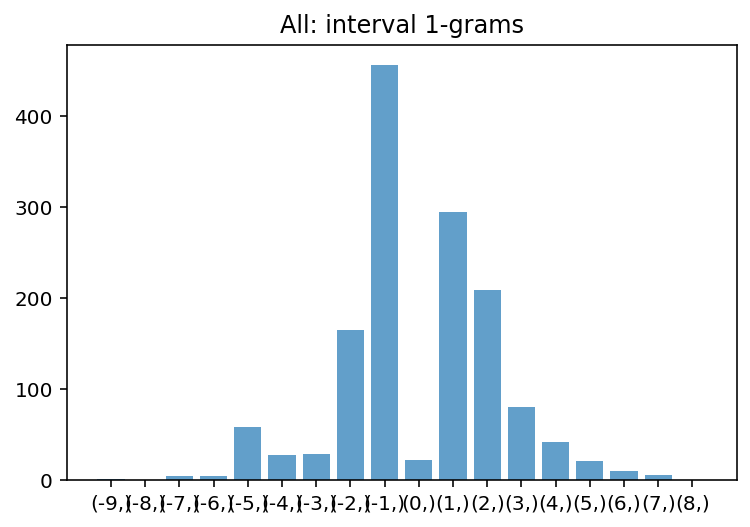

In [18]:
plot_n_grams(pieces, "interval", 1, title="All")
print(get_ngram_statistics(pieces, "interval", 1, title="All"))
print(get_firsts(pieces, "interval", 1, title="Beginning"))
print(get_full_stop_finals(pieces, "interval", 1, title="All full stop"))
print(get_one_after_full_stop_finals(pieces, "interval", 1, title="All after full stop"))
print(get_one_after_non_full_final(pieces, "interval", 1, title="All after non full stop"))

## Beginning of Pieces

Regarding the beginnings of the pieces, the auxiliary functions BIAN and RUN never occur in the data. This should also be reflected in the Markov model. Due to data scarcity of the finals (only 17 realizations in total), a simplified model for piece beginning is proposed in dependence on the final note as follows:

50% FINAL_NOTE, others with 12.5% each.

Beginnings of phrases are not modeled separately, since they do not show a clear trend without mode-specific analysis. 

In [19]:
print(get_firsts(pieces, "function", 1, title="Beginnings"))
print("----------------\n")
print(get_firsts(filter_by_final(pieces, GongdiaoStep.GONG), "function", 1, title=f"Beginnings {GongdiaoStep.GONG}"))
print(get_firsts(filter_by_final(pieces, GongdiaoStep.SHANG), "function", 1, title=f"Beginnings {GongdiaoStep.SHANG}"))
print(get_firsts(filter_by_final(pieces, GongdiaoStep.JUE), "function", 1, title=f"Beginnings {GongdiaoStep.JUE}"))
print(get_firsts(filter_by_final(pieces, GongdiaoStep.ZHI), "function", 1, title=f"Beginnings {GongdiaoStep.ZHI}"))
print(get_firsts(filter_by_final(pieces, GongdiaoStep.YU), "function", 1, title=f"Beginnings {GongdiaoStep.YU}"))
print("----------------\n")
print(get_one_after_full_stop_finals(filter_by_final(pieces, GongdiaoStep.GONG), "function", 1, title="All after full stop"))
print(get_one_after_full_stop_finals(filter_by_final(pieces, GongdiaoStep.SHANG), "function", 1, title="All after full stop"))
print(get_one_after_full_stop_finals(filter_by_final(pieces, GongdiaoStep.JUE), "function", 1, title="All after full stop"))
print(get_one_after_full_stop_finals(filter_by_final(pieces, GongdiaoStep.ZHI), "function", 1, title="All after full stop"))
print(get_one_after_full_stop_finals(filter_by_final(pieces, GongdiaoStep.YU), "function", 1, title="All after full stop"))

   Beginnings finals
      1. ('YU',): 41.18% (7)
      2. ('ZHI',): 17.65% (3)
      3. ('GONG',): 17.65% (3)
      4. ('SHANG',): 11.76% (2)
      5. ('JUE',): 11.76% (2)

----------------

   Beginnings GONG finals
      1. ('YU',): 66.67% (4)
      2. ('ZHI',): 16.67% (1)
      3. ('GONG',): 16.67% (1)

   Beginnings SHANG finals
      1. ('SHANG',): 50.00% (2)
      2. ('GONG',): 25.00% (1)
      3. ('YU',): 25.00% (1)

   Beginnings JUE finals
      1. ('JUE',): 100.00% (1)

   Beginnings ZHI finals
      1. ('GONG',): 100.00% (1)

   Beginnings YU finals
      1. ('YU',): 40.00% (2)
      2. ('ZHI',): 40.00% (2)
      3. ('JUE',): 20.00% (1)

----------------

   All after full stop finals
      1. ('YU',): 19.61% (10)
      2. ('JUE',): 17.65% (9)
      3. ('GONG',): 17.65% (9)
      4. (): 11.76% (6)
      5. ('RUN',): 9.80% (5)
      6. ('SHANG',): 9.80% (5)
      7. ('ZHI',): 9.80% (5)
      8. ('BIAN',): 3.92% (2)

   All after full stop finals
      1. ('BIAN',): 31.03% (9